In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as pd

# Initialize
1. File path where the input data files reside.
2. Dictionary of major airports consisting of IATA airport codes and airport city names

In [2]:
# Assign the directory of the input data files to a variable
input_data_path = 'Resources/'

# Since we are only interested in data related to major airports, create a dictionary of major
# airports with the states they are located in. This is useful for later analysis by state.
major_airports = {'ATL': 'GA',
                  'AUS': 'TX',
                  'BNA': 'TN',
                  'BOS': 'MA',
                  'BWI': 'MD',
                  'CLT': 'NC',
                  'DCA': 'VA',
                  'DEN': 'CO',
                  'DFW': 'TX',
                  'DTW': 'MI',
                  'EWR': 'NJ',
                  'FLL': 'FL',
                  'IAD': 'VA',
                  'IAH': 'TX',
                  'JFK': 'NY',
                  'LAS': 'NV',
                  'LAX': 'CA',
                  'LGA': 'NY',
                  'MCO': 'FL',
                  'MDW': 'IL',
                  'MIA': 'FL',
                  'MSP': 'MN',
                  'ORD': 'IL',
                  'PHL': 'PA',
                  'PHX': 'AZ',
                  'SAN': 'CA',
                  'SEA': 'WA',
                  'SFO': 'CA',
                  'SLC': 'UT',
                  'TPA': 'FL'}


# Step 1: Import Data
There are three sets of data:
1. Flight data  
   Flight data is retrieved from the `On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_*.csv` files in the `Resources/` folder.
   There is a file for each month between January 2018 and December 2023. Each file contains a list of all US domestic commercial flights in that month.
   We will use these files to retrieve the number of flights, the flight delays and the cancelled flights.  
   The source for this data is the Bureau of Transportation Statistics of the United States Department of Transportation at
   https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGK&QO_fu146_anzr=b0-gvzr as accessed between 4/8/2024 and 4/17/2024.  
   A file for each year and month between January 2018 and December 2023 was downloaded separately.
2. Number of passengers  
   That data is retrieved from the `*_Passengers_*.csv` files. There is a file for each of the major US airports. Each file contains the number of passengers
   that enplaned from that airport each month starting in October of 2002 until December of 2023. We will use these files to retrieve passenger volumes.  
   The source for this data is the Bureau of Transportation Statistics of the United States Department of Transportation at
   https://www.transtats.bts.gov/Data_Elements.aspx?Data=2 as accessed between 4/8/2024 and 4/17/2024.
   A file for each majior US airport was downloaded separately.
3. Average Airfares  
   The quarterly average airfare is retrieved from the `AverageFare_Q*.csv` files. There is a file for each quarter from Q1 of 2018 to Q3 of 2023. It contains
   the average airfare for each US airport.  
   **Note:** These files were not available in `.csv` format from the source. They were only available in a "pseudo' Excel format that was not recognized by
   the Pandas `read_excel` function. We therefore converted them to `.csv` files manually.  
   The source for this data is the Bureau of Transportation Statistics of the United States Department of Transportation at
   (https://www.transtats.bts.gov/AverageFare/) as accessed between 4/8/2024 and 4/17/2024.  
   A file for each quarter from Q1 of 2018 to Q3 of 2023 was downloaded separately.

The following code imports these file sets in turn.

## 1.1. Import Flight Data
**Note:** We use the Python `glob` library to retrieve a list of files to read. We learned about `glob` from https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/ as accessed on 4/12/2024.

In [3]:
# Create a list that contains the flights file names
flights_files = glob.glob(f'{input_data_path}On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_*.csv')

In [4]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all flights from
# 01/01/2018 to 12/31/2023.
flights_dataframes = []

# Loop over the files in the flight files list and process the data in each file
for file in flights_files:

    # Read the file into a DataFrame
    print(f'Processing file {file}...')
    try:
        df = pd.read_csv(f'{file}', low_memory=False)
        print('   Success.')
    except Exception as error:
        print('   Read failed.')
        print('   Error:', error)

    # Strip out any leading or trailing whitespace from column names and make sure columns
    # are lower case
    df.rename(columns = {name:name.strip().lower() for name in df.columns}, inplace=True)

    # Assign a list of columns to keep
    columns_to_keep = ['year',
                       'quarter',
                       'month',
                       'dayofmonth',
                       'dayofweek',
                       'flightdate',
                       'iata_code_marketing_airline',
                       'flight_number_marketing_airline',
                       'operating_airline',
                       'iata_code_operating_airline',
                       'flight_number_operating_airline',
                       'origin',
                       'origincityname',
                       'originstate',
                       'dest',
                       'destcityname',
                       'deststate',
                       'depdelay',
                       'depdelayminutes',
                       'arrdelay',
                       'arrdelayminutes',
                       'cancelled']
                       
    # Keep only columns we want to keep
    # Keep only flights (rows) that arrive at one of the major airports
    df = df[columns_to_keep].loc[df['dest'].isin(major_airports.keys())]

    # Drop any duplicates
    df = df.drop_duplicates()
    
    # Append current DataFrame to list of DataFrames
    flights_dataframes.append(df)

#display(flights_dataframes[0].head())    
# Concatenate all DataFrames into a big DataFrame and reset the index
df_flights = pd.concat(flights_dataframes).reset_index(drop=True)

# display(df.tail())
display(df_flights.tail())
display(df_flights.columns)

Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_1.csv...
   Success.
Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_10.csv...
   Success.
Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_11.csv...
   Success.
Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_12.csv...
   Success.
Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_2.csv...
   Success.
Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_3.csv...
   Success.
Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_4.csv...
   Success.
Processing file Resources\On_Time_Marketing_Carrier_On_Time_Performance_(Beginning_January_2018)_2018_5.csv...
   Success.
Processing fi

,year,quarter,month,dayofmonth,dayofweek,flightdate,iata_code_marketing_airline,flight_number_marketing_airline,operating_airline,iata_code_operating_airline,...,origincityname,originstate,dest,destcityname,deststate,depdelay,depdelayminutes,arrdelay,arrdelayminutes,cancelled
26403679,2023,3,9,1,5,2023-09-01,UA,3416,YX,YX,...,"Newark, NJ",NJ,DTW,"Detroit, MI",MI,-2.0,0.0,-32.0,0.0,0.0
26403680,2023,3,9,1,5,2023-09-01,UA,3410,YX,YX,...,"Bangor, ME",ME,EWR,"Newark, NJ",NJ,-8.0,0.0,-14.0,0.0,0.0
26403681,2023,3,9,1,5,2023-09-01,UA,3409,YX,YX,...,"Asheville, NC",NC,EWR,"Newark, NJ",NJ,-9.0,0.0,-8.0,0.0,0.0
26403682,2023,3,9,1,5,2023-09-01,UA,3404,YX,YX,...,"Newark, NJ",NJ,DTW,"Detroit, MI",MI,-7.0,0.0,-31.0,0.0,0.0
26403683,2023,3,9,1,5,2023-09-01,UA,3403,YX,YX,...,"Charleston, SC",SC,IAD,"Washington, DC",VA,-6.0,0.0,-17.0,0.0,0.0


Index(['year', 'quarter', 'month', 'dayofmonth', 'dayofweek', 'flightdate',
       'iata_code_marketing_airline', 'flight_number_marketing_airline',
       'operating_airline', 'iata_code_operating_airline',
       'flight_number_operating_airline', 'origin', 'origincityname',
       'originstate', 'dest', 'destcityname', 'deststate', 'depdelay',
       'depdelayminutes', 'arrdelay', 'arrdelayminutes', 'cancelled'],
      dtype='object')

In [5]:
# Replace 'NaN' values in 'depdelay', 'depdelayminutes', 'arrdelay', and 'arrdelayminutes' columns with 0.
df_flights[['depdelay', 'depdelayminutes', 'arrdelay', 'arrdelayminutes']] = df_flights[['depdelay', 'depdelayminutes', 'arrdelay', 'arrdelayminutes']].fillna(value=0)

# Make sure all columns have the same number of rows, so there are no 'NaN' values left
display(df_flights.count())

year                               26403684
quarter                            26403684
month                              26403684
dayofmonth                         26403684
dayofweek                          26403684
flightdate                         26403684
iata_code_marketing_airline        26403684
flight_number_marketing_airline    26403684
operating_airline                  26403684
iata_code_operating_airline        26403684
flight_number_operating_airline    26403684
origin                             26403684
origincityname                     26403684
originstate                        26403684
dest                               26403684
destcityname                       26403684
deststate                          26403684
depdelay                           26403684
depdelayminutes                    26403684
arrdelay                           26403684
arrdelayminutes                    26403684
cancelled                          26403684
dtype: int64

In [6]:
# Convert 'year', 'quarter', 'month', 'dayofmonth', 'dayofweek' to integers to allow for proper merging with other DataFrames.
df_flights[['year', 'quarter', 'month', 'dayofmonth', 'dayofweek']] = df_flights[['year', 'quarter', 'month', 'dayofmonth', 'dayofweek']].astype(int)
display(df_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26403684 entries, 0 to 26403683
Data columns (total 22 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   year                             int32  
 1   quarter                          int32  
 2   month                            int32  
 3   dayofmonth                       int32  
 4   dayofweek                        int32  
 5   flightdate                       object 
 6   iata_code_marketing_airline      object 
 7   flight_number_marketing_airline  int64  
 8   operating_airline                object 
 9   iata_code_operating_airline      object 
 10  flight_number_operating_airline  int64  
 11  origin                           object 
 12  origincityname                   object 
 13  originstate                      object 
 14  dest                             object 
 15  destcityname                     object 
 16  deststate                        object 
 17  depdel

None

## 1.2. Import Passenger Data

In [7]:
# Create a list of the input files that contain passengers data
passengers_files = glob.glob(f'{input_data_path}*_Passengers_*.csv')

In [30]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all monthly passengers
# from January 2018 to December 2023.
passengers_dataframes = []

# Loop over the files in the passengers files list and process the data in each file
for file in passengers_files:

    # Read the passengers file into a DataFrame.
    # Skip the first row in each file since it is a header row we do not need
    print(f'Processing file {file}...')
    # Retrieve IATA airport code from filename
    airport = file[len(input_data_path):len(input_data_path)+3]
    # print(airport)

    # Make sure airport is a major airport (is in the dictionary of major airports)
    if airport in major_airports.keys():
        try:
            df = pd.read_csv(f'{file}',
                             skiprows=1,
                             engine='python')
            print('   Success.')
        except Exception as error:
            print('   Read failed.')
            print('   Error:', error)

        # Keep only columns 'Year', 'Month', and 'Domestic' (for domestic passengers)
        # Keep only rows where the value of the 'Month' field is not equal to 'TOTAL',
        # the 'Year' has a numeric value and is larger than 2017
        df = df[['Year', 'Month', 'DOMESTIC']][(df['Month'] != 'TOTAL') &
                                               (df['Year'].str.isnumeric() == True) &
                                               (df['Year'] > '2017')]
        
        # Add a column called 'Origin' containing the origin airport IATA code
        df['Origin'] = airport

        # Drop any duplicates
        df = df.drop_duplicates() 

        # Append current DataFrame to list of DataFrames
        passengers_dataframes.append(df)

    else:
        print(f'The airport {airport} was not found.')

# Concatenate all DataFrames into a big DataFrame and reset the index
df_passengers = pd.concat(passengers_dataframes).reset_index(drop=True)

# display(df.tail())
display(df_passengers.tail())
display(df_passengers.shape)
display(df_passengers.columns)

Processing file Resources\ATL_Passengers_4_10_2024 1_20_52 PM.csv...
   Success.
Processing file Resources\AUS_Passengers_4_10_2024 2_18_16 PM.csv...
   Success.
Processing file Resources\BNA_Passengers_4_10_2024 2_21_25 PM.csv...
   Success.
Processing file Resources\BOS_Passengers_4_10_2024 1_58_33 PM.csv...
   Success.
Processing file Resources\BWI_Passengers_4_10_2024 2_15_11 PM.csv...
   Success.
Processing file Resources\CLT_Passengers_4_10_2024 1_48_19 PM.csv...
   Success.
Processing file Resources\DCA_Passengers_4_10_2024 2_11_18 PM.csv...
   Success.
Processing file Resources\DEN_Passengers_4_10_2024 1_34_52 PM.csv...
   Success.
Processing file Resources\DFW_Passengers_4_10_2024 1_25_49 PM.csv...
   Success.
Processing file Resources\DTW_Passengers_4_10_2024 2_06_01 PM.csv...
   Success.
Processing file Resources\EWR_Passengers_4_10_2024 1_53_01 PM.csv...
   Success.
Processing file Resources\FLL_Passengers_4_10_2024 2_01_28 PM.csv...
   Success.
Processing file Resources\IA

,Year,Month,DOMESTIC,Origin
2155,2023,8,"803,898",TPA
2156,2023,9,"789,879",TPA
2157,2023,10,"914,515",TPA
2158,2023,11,"956,988",TPA
2159,2023,12,"982,672",TPA


(2160, 4)

Index(['Year', 'Month', 'DOMESTIC', 'Origin'], dtype='object')

In [31]:
# Make sure all columns have the same number of rows, so there are no 'NaN' values left
display(df_passengers.count())

Year        2160
Month       2160
DOMESTIC    2160
Origin      2160
dtype: int64

In [32]:
# Convert 'Year' and 'Month' to integers to allow for proper merging with other DataFrames.
df_passengers[['Year', 'Month']] = df_passengers[['Year', 'Month']].astype(int)
display(df_passengers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      2160 non-null   int32 
 1   Month     2160 non-null   int32 
 2   DOMESTIC  2160 non-null   object
 3   Origin    2160 non-null   object
dtypes: int32(2), object(2)
memory usage: 50.8+ KB


None

In [33]:
# Convert the 'DOMESTIC' column to an integer. It contains the number of domestic
# passengers which we will aggregate later. 

# First, remove the ',' in the string
df_passengers['DOMESTIC'] = df_passengers['DOMESTIC'].astype(str).str.replace(",", "")

# Now we can convert it to an integer
df_passengers['DOMESTIC'] = df_passengers['DOMESTIC'].astype(int)
display(df_passengers.info())
display(df_passengers.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      2160 non-null   int32 
 1   Month     2160 non-null   int32 
 2   DOMESTIC  2160 non-null   int32 
 3   Origin    2160 non-null   object
dtypes: int32(3), object(1)
memory usage: 42.3+ KB


None

,Year,Month,DOMESTIC,Origin
0,2018,1,3232202,ATL
1,2018,2,3204716,ATL
2,2018,3,3965168,ATL
3,2018,4,3844151,ATL
4,2018,5,4081926,ATL


## 1.3. Import Fare Data

In [12]:
# Create a list of the input files that contain fares data
fares_files = glob.glob(f'{input_data_path}AverageFare_Q*.csv')

In [34]:
# Initialize a list to hold the DataFrames from the processed files. All the DataFrames from
# this list will be concatenated into a big DataFrame containing data for all quarterly fare
# averages from Q1 2018 to Q3 2023.
fares_dataframes = []

# Loop over the files in the fares files list and process the data in each file
for file in fares_files:

    # Read the fares file into a DataFrame.
    print(f'Processing file {file}...')

    try:
        df = pd.read_csv(f'{file}')
        print('   Success.')
    except Exception as error:
        print('   Read failed.')
        print('   Error:', error)

    # Keep only columns 'Quarter', 'Year', 'Airport Code', 'City Name',
    # 'Average Fare ($)', 'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)'
    # Keep only fares (rows) that arrive at one of the major airports
    df = df[['Quarter',
            'Year',
            'Airport Code',
            'City Name',
            'Average Fare ($)',
            'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)']].loc[df['Airport Code'].isin(major_airports.keys())]
    
    # Drop any duplicates
    df = df.drop_duplicates()

    # Append current DataFrame to list of DataFrames
    fares_dataframes.append(df)

# Concatenate all DataFrames into a big DataFrame and reset the index
df_fares = pd.concat(fares_dataframes).reset_index(drop=True)

# display(df.tail())
display(df_fares.tail())
display(df_fares.shape)
display(df_fares.columns)

Processing file Resources\AverageFare_Q1_2018.csv...
   Success.
Processing file Resources\AverageFare_Q1_2019.csv...
   Success.
Processing file Resources\AverageFare_Q1_2020.csv...
   Success.
Processing file Resources\AverageFare_Q1_2021.csv...
   Success.
Processing file Resources\AverageFare_Q1_2022.csv...
   Success.
Processing file Resources\AverageFare_Q1_2023.csv...
   Success.
Processing file Resources\AverageFare_Q2_2018.csv...
   Success.
Processing file Resources\AverageFare_Q2_2019.csv...
   Success.
Processing file Resources\AverageFare_Q2_2020.csv...
   Success.
Processing file Resources\AverageFare_Q2_2021.csv...
   Success.
Processing file Resources\AverageFare_Q2_2022.csv...
   Success.
Processing file Resources\AverageFare_Q2_2023.csv...
   Success.
Processing file Resources\AverageFare_Q3_2018.csv...
   Success.
Processing file Resources\AverageFare_Q3_2019.csv...
   Success.
Processing file Resources\AverageFare_Q3_2020.csv...
   Success.
Processing file Resources

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($) (Base Quarter: Q3-2023)
685,4.0,2022.0,BNA,Nashville,349.47,360.43
686,4.0,2022.0,SLC,Salt Lake City,439.50,453.28
687,4.0,2022.0,CLT,Charlotte,468.61,483.31
688,4.0,2022.0,MDW,Chicago-Midway,301.63,311.09
689,4.0,2022.0,IAD,Washington-Dulles,503.53,519.32


(690, 6)

Index(['Quarter', 'Year', 'Airport Code', 'City Name', 'Average Fare ($)',
       'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)'],
      dtype='object')

In [35]:
# Make sure all columns have the same number of rows, so there are no 'NaN' values left
display(df_fares.count())

Quarter                                                         690
Year                                                            690
Airport Code                                                    690
City Name                                                       690
Average Fare ($)                                                690
Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)    690
dtype: int64

In [36]:
# Rename the column 'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)' to 'Inflation Adjusted Average Fare ($)'
df_fares = df_fares.rename(columns={'Inflation Adjusted Average Fare ($) (Base Quarter:  Q3-2023)': 'Inflation Adjusted Average Fare ($)'})

# Step 2: Perform Basic Consistency Checks
Since the passenger enplanement raw data is aggregated by airport, year, and month,
we need to aggregate the flights data by airport, year, and month as well, so we can
properly correlate the data from different sources.

**Note:** As customers we are interested in arrival delays more than departure delays.
Therefore, we are picking the destination airport, 'dest', in our aggregation.

In [23]:
# Find the counts
df_flights_summary = df_flights.groupby(['year', 'month', 'dest']).count()
display(df_flights_summary.head())

# Perform consistency check: If we sum over the aggregation, we should get back the
# values obtained using the 'count()' function (see count on 'df_flights' DataFrame).
# The index columns are not shown.
display(df_flights_summary.sum())

# Through manual inspection we see that our expectation is met.

quarter  dayofmonth  dayofweek  flightdate  \
year month dest                                               
2018 1     ATL     30730       30730      30730       30730   
           AUS      4713        4713       4713        4713   
           BNA      5789        5789       5789        5789   
           BOS     11306       11306      11306       11306   
           BWI      8560        8560       8560        8560   

                 iata_code_marketing_airline  flight_number_marketing_airline  \
year month dest                                                                 
2018 1     ATL                         30730                            30730   
           AUS                          4713                             4713   
           BNA                          5789                             5789   
           BOS                         11306                            11306   
           BWI                          8560                             8560   

                 operating_airline  iata_code_operating_airline  \
year month dest                                                   
2018 1     ATL               30730                        30730   
           AUS                4713                         4713   
           BNA                5789                         5789   
           BOS               11306                        11306   
           BWI                8560                         8560   

                 flight_number_operating_airline  origin  origincityname  \
year month dest                                                            
2018 1     ATL                             30730   30730           30730   
           AUS                              4713    4713            4713   
           BNA                              5789    5789            5789   
           BOS                             11306   11306           11306   
           BWI                              8560    8560            8560   

                 originstate  destcityname  deststate  depdelay  \
year month dest                                                   
2018 1     ATL         30730         30730      30730     30730   
           AUS          4713          4713       4713      4713   
           BNA          5789          5789       5789      5789   
           BOS         11306         11306      11306     11306   
           BWI          8560          8560       8560      8560   

                 depdelayminutes  arrdelay  arrdelayminutes  cancelled  
year month dest                                                         
2018 1     ATL             30730     30730            30730      30730  
           AUS              4713      4713             4713       4713  
           BNA              5789      5789             5789       5789  
           BOS             11306     11306            11306      11306  
           BWI              8560      8560             8560       8560

quarter                            26403684
dayofmonth                         26403684
dayofweek                          26403684
flightdate                         26403684
iata_code_marketing_airline        26403684
flight_number_marketing_airline    26403684
operating_airline                  26403684
iata_code_operating_airline        26403684
flight_number_operating_airline    26403684
origin                             26403684
origincityname                     26403684
originstate                        26403684
destcityname                       26403684
deststate                          26403684
depdelay                           26403684
depdelayminutes                    26403684
arrdelay                           26403684
arrdelayminutes                    26403684
cancelled                          26403684
dtype: int64

Determine the number of flights by airport per year and month.
We can use any column that has a value count equal to 'total_flights' in the 'df_flights'
DataFrame. We are picking 'flight_number_marketing_airline'.

In [24]:
# Grab one column that contains a number of flights by year, month, and destination.
df_flights_summary = df_flights_summary[['flight_number_marketing_airline']]
display(df_flights_summary.head())
display(df_flights_summary.tail())

flight_number_marketing_airline
year month dest                                 
2018 1     ATL                             30730
           AUS                              4713
           BNA                              5789
           BOS                             11306
           BWI                              8560

flight_number_marketing_airline
year month dest                                 
2023 12    SAN                              7898
           SEA                             14043
           SFO                             11289
           SLC                              9361
           TPA                              7261

In [25]:
# Determine the number of records. It should be #years * #months per year * #airports.
# In our case, 6*12*30=2160. That is what we get. Note that this is also qual to the number of rows in
# 'df_passengers' which is also what we expect.
df_flights_summary.count()

flight_number_marketing_airline    2160
dtype: int64

# Step 3: Prepare a Summary DataFrame for Data Exploration

## 3.1. Calculate the Average Arrival Delay by Year, Month and Airport

In [26]:
# Retrieve the arrival delay, 'arrdelayminutes', and average over 'year', 'month', 'dest'
df_delay_mean = df_flights[['year', 'month', 'dest', 'arrdelayminutes']].groupby(['year', 'month', 'dest']).mean()
# display(df_delay.head())

# Merge average delay on arrival to the flights summary DataFrame
df_flights_summary = pd.merge(df_flights_summary, df_delay_mean,
                              how='inner',
                              on=['year', 'month', 'dest'])
display(df_flights_summary.head())
# display(df_flights_summary.tail())
display(df_flights_summary.count())

flight_number_marketing_airline  arrdelayminutes
year month dest                                                  
2018 1     ATL                             30730        14.153173
           AUS                              4713         8.766603
           BNA                              5789        10.645880
           BOS                             11306        17.091191
           BWI                              8560         8.853037

flight_number_marketing_airline    2160
arrdelayminutes                    2160
dtype: int64

## 3.2. Calculate Cancellations by Year, Month, and Airport.
To calculate the cancellations we sum over the 'cancelled' column of the 'df_flights' DataFrame
since, according to the data dictionary, it has a value of 1 when a flight is cancelled and a value
of 0 if it is not cancelled.

In [27]:
# Retrieve the cancelled flights and sum over 'year', 'month', 'dest'.
df_cancelled_sum = df_flights[['year', 'month', 'dest', 'cancelled']].groupby(['year', 'month', 'dest']).sum()
display(df_cancelled_sum.head())

# Merge cancelled flights to the flights summary DataFrame
df_flights_summary = pd.merge(df_flights_summary, df_cancelled_sum,
                              how='inner',
                              on=['year', 'month', 'dest'])
display(df_flights_summary.head())
# display(df_flights_summary.tail())
display(df_flights_summary.count())

cancelled
year month dest           
2018 1     ATL       882.0
           AUS       102.0
           BNA       179.0
           BOS       805.0
           BWI       220.0

flight_number_marketing_airline  arrdelayminutes  cancelled
year month dest                                                             
2018 1     ATL                             30730        14.153173      882.0
           AUS                              4713         8.766603      102.0
           BNA                              5789        10.645880      179.0
           BOS                             11306        17.091191      805.0
           BWI                              8560         8.853037      220.0

flight_number_marketing_airline    2160
arrdelayminutes                    2160
cancelled                          2160
dtype: int64

## 3.3. Calculate the Percentage of Flights Cancelled
This allows for an easy comparison across airports, months, and years.

In [28]:
# Add a column for the cancellation percentage and calculate it
df_flights_summary['Cancelled %'] = df_flights_summary['cancelled']/df_flights_summary['flight_number_marketing_airline']*100

display(df_flights_summary.head())
display(df_flights_summary.count())

flight_number_marketing_airline  arrdelayminutes  cancelled  \
year month dest                                                                
2018 1     ATL                             30730        14.153173      882.0   
           AUS                              4713         8.766603      102.0   
           BNA                              5789        10.645880      179.0   
           BOS                             11306        17.091191      805.0   
           BWI                              8560         8.853037      220.0   

                 Cancelled %  
year month dest               
2018 1     ATL      2.870159  
           AUS      2.164227  
           BNA      3.092071  
           BOS      7.120113  
           BWI      2.570093

flight_number_marketing_airline    2160
arrdelayminutes                    2160
cancelled                          2160
Cancelled %                        2160
dtype: int64

## 3.4. Add the Number of Passengers

In [37]:
# Rename the columns in the 'df_passengers' DataFrame so that the columns we will use to merge with the
# 'df_flights_summary' DataFrame have the same names
df_passengers = df_passengers.rename(columns={'Year': 'year', 'Month': 'month', 'Origin': 'dest'})
display(df_passengers.head())

# Set the (multi) index
df_passengers = df_passengers.set_index(['year', 'month', 'dest'])
display(df_passengers.head())
display(df_passengers.tail())

# Merge passengers with the flights summary DataFrame
df_flights_summary = pd.merge(df_flights_summary, df_passengers[['DOMESTIC']],
                              how='inner',
                              on=['year', 'month', 'dest'])
display(df_flights_summary.head())
# display(df_flights_summary.tail())
display(df_flights_summary.count())

,year,month,DOMESTIC,dest
0,2018,1,3232202,ATL
1,2018,2,3204716,ATL
2,2018,3,3965168,ATL
3,2018,4,3844151,ATL
4,2018,5,4081926,ATL


DOMESTIC
year month dest          
2018 1     ATL    3232202
     2     ATL    3204716
     3     ATL    3965168
     4     ATL    3844151
     5     ATL    4081926

DOMESTIC
year month dest          
2023 8     TPA     803898
     9     TPA     789879
     10    TPA     914515
     11    TPA     956988
     12    TPA     982672

flight_number_marketing_airline  arrdelayminutes  cancelled  \
year month dest                                                                
2018 1     ATL                             30730        14.153173      882.0   
           AUS                              4713         8.766603      102.0   
           BNA                              5789        10.645880      179.0   
           BOS                             11306        17.091191      805.0   
           BWI                              8560         8.853037      220.0   

                 Cancelled %  DOMESTIC  
year month dest                         
2018 1     ATL      2.870159   3232202  
           AUS      2.164227    483324  
           BNA      3.092071    483139  
           BOS      7.120113   1027783  
           BWI      2.570093    882892

flight_number_marketing_airline    2160
arrdelayminutes                    2160
cancelled                          2160
Cancelled %                        2160
DOMESTIC                           2160
dtype: int64

## 3.5. Add the Airfare
The fares are only available by quarter, however, our other data is available by month.
Therefore, we will add a column for the month to the fares dataframe and use the data
for the quarter for each month in that quarter.

We learned how to apply the `np.repeat` function from https://www.statology.org/pandas-replicate-rows/ as accessed on 4/13/2024.

In [38]:
# Replicate each row three times since each quarter consists of three months
df_fares_monthly = pd.DataFrame(np.repeat(df_fares.values, 3, axis=0))

# Since this did not preserve the column labels, add them back
df_fares_monthly.columns = df_fares.columns
display(df_fares_monthly.head())

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
0,1.0,2018.0,LAX,Los Angeles,336.93,415.52
1,1.0,2018.0,LAX,Los Angeles,336.93,415.52
2,1.0,2018.0,LAX,Los Angeles,336.93,415.52
3,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71
4,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71


In [39]:
# Sort by year and quarter
df_fares_monthly.sort_values(by=['Year', 'Quarter'], inplace=True)
display(df_fares_monthly.head())
display(df_fares_monthly.shape)

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
0,1.0,2018.0,LAX,Los Angeles,336.93,415.52
1,1.0,2018.0,LAX,Los Angeles,336.93,415.52
2,1.0,2018.0,LAX,Los Angeles,336.93,415.52
3,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71
4,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71


(2070, 6)

Create a list of months

In [40]:
# Set a list of quarters equal to the 'Quarter' column in 'df_fares_monthly'
quarters = df_fares_monthly['Quarter'].to_list()

# Initialize a list for the months
months = []

# Loop over the list of quarters and create a list of months.
# The month is given by the remainder of dividing the index by three
# (giving 0, 1, 2) and adding 1 for Q1, 4 for Q2, 7 for Q3, and 10 for Q4.
# The set of numbers 1, 4, 7, and 10 is calculated by adding one to the product
# of the quarter number minus 1 and three.
for i in range(len(quarters)):
    months.append(i%3+((quarters[i]-1)*3+1))
    # print(f'Index: {i}, Quarter: {quarters[i]} Month: {months[i]}')

# Add the list of months as a column to the 'df_fares_monthly' dataframe.
df_fares_monthly['Month'] = months
display(df_fares_monthly.head())

,Quarter,Year,Airport Code,City Name,Average Fare ($),Inflation Adjusted Average Fare ($),Month
0,1.0,2018.0,LAX,Los Angeles,336.93,415.52,1.0
1,1.0,2018.0,LAX,Los Angeles,336.93,415.52,2.0
2,1.0,2018.0,LAX,Los Angeles,336.93,415.52,3.0
3,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71,1.0
4,1.0,2018.0,ORD,Chicago-O'Hare,341.14,420.71,2.0


In [41]:
# Prepare the 'df_flights_summary' DataFrame for merger with the 'df_fares_monthly'
# Dataframe by
#   * Resetting the index and
#   * Renaming the 'year', 'month', and 'dest' columns to 'Year', 'Month', and
#     'Airport Code'
df_flights_summary.reset_index(inplace=True)
df_flights_summary.rename(columns = {'year': 'Year',
                                     'month': 'Month',
                                     'dest': 'Airport Code'}, inplace=True)
display(df_flights_summary.head())

,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC
0,2018,1,ATL,30730,14.153173,882.0,2.870159,3232202
1,2018,1,AUS,4713,8.766603,102.0,2.164227,483324
2,2018,1,BNA,5789,10.645880,179.0,3.092071,483139
3,2018,1,BOS,11306,17.091191,805.0,7.120113,1027783
4,2018,1,BWI,8560,8.853037,220.0,2.570093,882892


In [42]:
# Merge the 'df_fares_monthly' DataFrame and the 'df_flights_summary' DataFrame
# into the final summary DataFrame
df_summary = pd.merge(df_flights_summary, df_fares_monthly,
                      how='left',
                      left_on=['Year', 'Month', 'Airport Code'],
                      right_on=['Year', 'Month', 'Airport Code'])

display(df_summary.head())
display(df_summary.tail())

,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC,Quarter,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
0,2018,1,ATL,30730,14.153173,882.0,2.870159,3232202,1.0,Atlanta,361.16,445.4
1,2018,1,AUS,4713,8.766603,102.0,2.164227,483324,1.0,Austin,348.72,430.06
2,2018,1,BNA,5789,10.645880,179.0,3.092071,483139,1.0,Nashville,351.81,433.87
3,2018,1,BOS,11306,17.091191,805.0,7.120113,1027783,1.0,Boston,323.31,398.73
4,2018,1,BWI,8560,8.853037,220.0,2.570093,882892,1.0,Baltimore,310.95,383.47


,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC,Quarter,City Name,Average Fare ($),Inflation Adjusted Average Fare ($)
2155,2023,12,SAN,7898,7.465688,24.0,0.303874,982726,NaN,NaN,NaN,NaN
2156,2023,12,SEA,14043,9.346650,109.0,0.776187,1658110,NaN,NaN,NaN,NaN
2157,2023,12,SFO,11289,15.317832,38.0,0.336611,1446506,NaN,NaN,NaN,NaN
2158,2023,12,SLC,9361,9.041876,16.0,0.170922,979522,NaN,NaN,NaN,NaN
2159,2023,12,TPA,7261,13.752927,25.0,0.344305,982672,NaN,NaN,NaN,NaN


In [43]:
# Make sure there are no unexpected NaN values.
# We expect the last 90 rows for columns 'Quarter', 'City Name', 'Average Fare ($)'
# and 'Inflation Adjusted Average Fare ($)' to have NaN values. All other columns
# should have 2160 rows. 
display(df_summary.count())

Year                                   2160
Month                                  2160
Airport Code                           2160
flight_number_marketing_airline        2160
arrdelayminutes                        2160
cancelled                              2160
Cancelled %                            2160
DOMESTIC                               2160
Quarter                                2070
City Name                              2070
Average Fare ($)                       2070
Inflation Adjusted Average Fare ($)    2070
dtype: int64

## 3.6. Get the Summary DataFrame Ready for Visualizations
This consists of
1. Adding a column for the two letter abbreviation of the state in which the airport is located.
2. Adding a `Year-Month` column so we can slice the data by any year/month combination.
3. Adding missing data to the `Quarter` column.
4. Rearranging and renaming the columns to make the summary DataFrame more user-friendly.
5. Appropriately adjusting the datatypes of all columns.

In [44]:
# Add a 'State' column
df_summary['State'] = [major_airports[airport] for airport in df_summary['Airport Code'].to_list()]

display(df_summary.head())

,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC,Quarter,City Name,Average Fare ($),Inflation Adjusted Average Fare ($),State
0,2018,1,ATL,30730,14.153173,882.0,2.870159,3232202,1.0,Atlanta,361.16,445.4,GA
1,2018,1,AUS,4713,8.766603,102.0,2.164227,483324,1.0,Austin,348.72,430.06,TX
2,2018,1,BNA,5789,10.645880,179.0,3.092071,483139,1.0,Nashville,351.81,433.87,TN
3,2018,1,BOS,11306,17.091191,805.0,7.120113,1027783,1.0,Boston,323.31,398.73,MA
4,2018,1,BWI,8560,8.853037,220.0,2.570093,882892,1.0,Baltimore,310.95,383.47,MD


In [45]:
# Add a 'Year-Month' column.
df_summary['Year-Month'] = [f"{df_summary['Year'][i]}-{str(df_summary['Month'][i]).zfill(2)}" for i in df_summary.index]

display(df_summary.head())

,Year,Month,Airport Code,flight_number_marketing_airline,arrdelayminutes,cancelled,Cancelled %,DOMESTIC,Quarter,City Name,Average Fare ($),Inflation Adjusted Average Fare ($),State,Year-Month
0,2018,1,ATL,30730,14.153173,882.0,2.870159,3232202,1.0,Atlanta,361.16,445.4,GA,2018-01
1,2018,1,AUS,4713,8.766603,102.0,2.164227,483324,1.0,Austin,348.72,430.06,TX,2018-01
2,2018,1,BNA,5789,10.645880,179.0,3.092071,483139,1.0,Nashville,351.81,433.87,TN,2018-01
3,2018,1,BOS,11306,17.091191,805.0,7.120113,1027783,1.0,Boston,323.31,398.73,MA,2018-01
4,2018,1,BWI,8560,8.853037,220.0,2.570093,882892,1.0,Baltimore,310.95,383.47,MD,2018-01


In [46]:
# Fill in missing values in the 'Quarter' column
df_summary['Quarter'].fillna(value=4, inplace=True)

In [47]:
# Rearrange columns
df_summary = df_summary[['Year',
                         'Quarter',
                         'Month',
                         'Year-Month',
                         'Airport Code',
                         'City Name',
                         'State',
                         'flight_number_marketing_airline',
                         'DOMESTIC',
                         'arrdelayminutes',
                         'cancelled',
                         'Cancelled %',
                         'Average Fare ($)',
                         'Inflation Adjusted Average Fare ($)']]
display(df_summary.head())
display(df_summary.tail())

,Year,Quarter,Month,Year-Month,Airport Code,City Name,State,flight_number_marketing_airline,DOMESTIC,arrdelayminutes,cancelled,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($)
0,2018,1.0,1,2018-01,ATL,Atlanta,GA,30730,3232202,14.153173,882.0,2.870159,361.16,445.4
1,2018,1.0,1,2018-01,AUS,Austin,TX,4713,483324,8.766603,102.0,2.164227,348.72,430.06
2,2018,1.0,1,2018-01,BNA,Nashville,TN,5789,483139,10.645880,179.0,3.092071,351.81,433.87
3,2018,1.0,1,2018-01,BOS,Boston,MA,11306,1027783,17.091191,805.0,7.120113,323.31,398.73
4,2018,1.0,1,2018-01,BWI,Baltimore,MD,8560,882892,8.853037,220.0,2.570093,310.95,383.47


,Year,Quarter,Month,Year-Month,Airport Code,City Name,State,flight_number_marketing_airline,DOMESTIC,arrdelayminutes,cancelled,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($)
2155,2023,4.0,12,2023-12,SAN,NaN,CA,7898,982726,7.465688,24.0,0.303874,NaN,NaN
2156,2023,4.0,12,2023-12,SEA,NaN,WA,14043,1658110,9.346650,109.0,0.776187,NaN,NaN
2157,2023,4.0,12,2023-12,SFO,NaN,CA,11289,1446506,15.317832,38.0,0.336611,NaN,NaN
2158,2023,4.0,12,2023-12,SLC,NaN,UT,9361,979522,9.041876,16.0,0.170922,NaN,NaN
2159,2023,4.0,12,2023-12,TPA,NaN,FL,7261,982672,13.752927,25.0,0.344305,NaN,NaN


In [48]:
# Rename columns
df_summary.rename(columns={'Airport Code': 'Airport',
                           'flight_number_marketing_airline': 'No. of Flights',
                           'arrdelayminutes': 'Average Delay (Minutes)',
                           'cancelled': 'Cancelled Flights',
                           'DOMESTIC': 'Passengers',
                           'City Name': 'City'}, inplace=True)
display(df_summary.head())

,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($)
0,2018,1.0,1,2018-01,ATL,Atlanta,GA,30730,3232202,14.153173,882.0,2.870159,361.16,445.4
1,2018,1.0,1,2018-01,AUS,Austin,TX,4713,483324,8.766603,102.0,2.164227,348.72,430.06
2,2018,1.0,1,2018-01,BNA,Nashville,TN,5789,483139,10.645880,179.0,3.092071,351.81,433.87
3,2018,1.0,1,2018-01,BOS,Boston,MA,11306,1027783,17.091191,805.0,7.120113,323.31,398.73
4,2018,1.0,1,2018-01,BWI,Baltimore,MD,8560,882892,8.853037,220.0,2.570093,310.95,383.47


In [49]:
# Adjust the data types
df_summary[['Year',
            'Quarter',
            'Month',
            'No. of Flights',
            'Cancelled Flights',
            'Passengers']] = df_summary[['Year',
                                         'Quarter',
                                         'Month',
                                         'No. of Flights',
                                         'Cancelled Flights',
                                         'Passengers']].astype('int64')
df_summary[['Average Delay (Minutes)',
            'Cancelled %']] = df_summary[['Average Delay (Minutes)',
                                          'Cancelled %']].astype(float).round(2)
df_summary[['Average Fare ($)',
            'Inflation Adjusted Average Fare ($)']] = df_summary[['Average Fare ($)',
                                                                  'Inflation Adjusted Average Fare ($)']].astype(float).round(2)
display(df_summary.info())
display(df_summary.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 2160 non-null   int64  
 1   Quarter                              2160 non-null   int64  
 2   Month                                2160 non-null   int64  
 3   Year-Month                           2160 non-null   object 
 4   Airport                              2160 non-null   object 
 5   City                                 2070 non-null   object 
 6   State                                2160 non-null   object 
 7   No. of Flights                       2160 non-null   int64  
 8   Passengers                           2160 non-null   int64  
 9   Average Delay (Minutes)              2160 non-null   float64
 10  Cancelled Flights                    2160 non-null   int64  
 11  Cancelled %                   

None

,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($)
0,2018,1,1,2018-01,ATL,Atlanta,GA,30730,3232202,14.15,882,2.87,361.16,445.40
1,2018,1,1,2018-01,AUS,Austin,TX,4713,483324,8.77,102,2.16,348.72,430.06
2,2018,1,1,2018-01,BNA,Nashville,TN,5789,483139,10.65,179,3.09,351.81,433.87
3,2018,1,1,2018-01,BOS,Boston,MA,11306,1027783,17.09,805,7.12,323.31,398.73
4,2018,1,1,2018-01,BWI,Baltimore,MD,8560,882892,8.85,220,2.57,310.95,383.47


In [50]:
# Add a column passengers per flight
df_summary['Passengers per Flight'] = df_summary['Passengers']/df_summary['No. of Flights']
display(df_summary.info())
display(df_summary.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 2160 non-null   int64  
 1   Quarter                              2160 non-null   int64  
 2   Month                                2160 non-null   int64  
 3   Year-Month                           2160 non-null   object 
 4   Airport                              2160 non-null   object 
 5   City                                 2070 non-null   object 
 6   State                                2160 non-null   object 
 7   No. of Flights                       2160 non-null   int64  
 8   Passengers                           2160 non-null   int64  
 9   Average Delay (Minutes)              2160 non-null   float64
 10  Cancelled Flights                    2160 non-null   int64  
 11  Cancelled %                   

None

,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($),Passengers per Flight
0,2018,1,1,2018-01,ATL,Atlanta,GA,30730,3232202,14.15,882,2.87,361.16,445.40,105.180670
1,2018,1,1,2018-01,AUS,Austin,TX,4713,483324,8.77,102,2.16,348.72,430.06,102.551241
2,2018,1,1,2018-01,BNA,Nashville,TN,5789,483139,10.65,179,3.09,351.81,433.87,83.458110
3,2018,1,1,2018-01,BOS,Boston,MA,11306,1027783,17.09,805,7.12,323.31,398.73,90.905979
4,2018,1,1,2018-01,BWI,Baltimore,MD,8560,882892,8.85,220,2.57,310.95,383.47,103.141589


# Step 4: Data Exploration and Visualization

## 4.1. Preliminary Analysis
Define periods for before, during, and after Covid-19. We use passenger volume to define those periods.

,Passengers
Year,
2018,529.023871
2019,548.296878
2020,228.773502
2021,410.047988
2022,505.940162
2023,552.691103


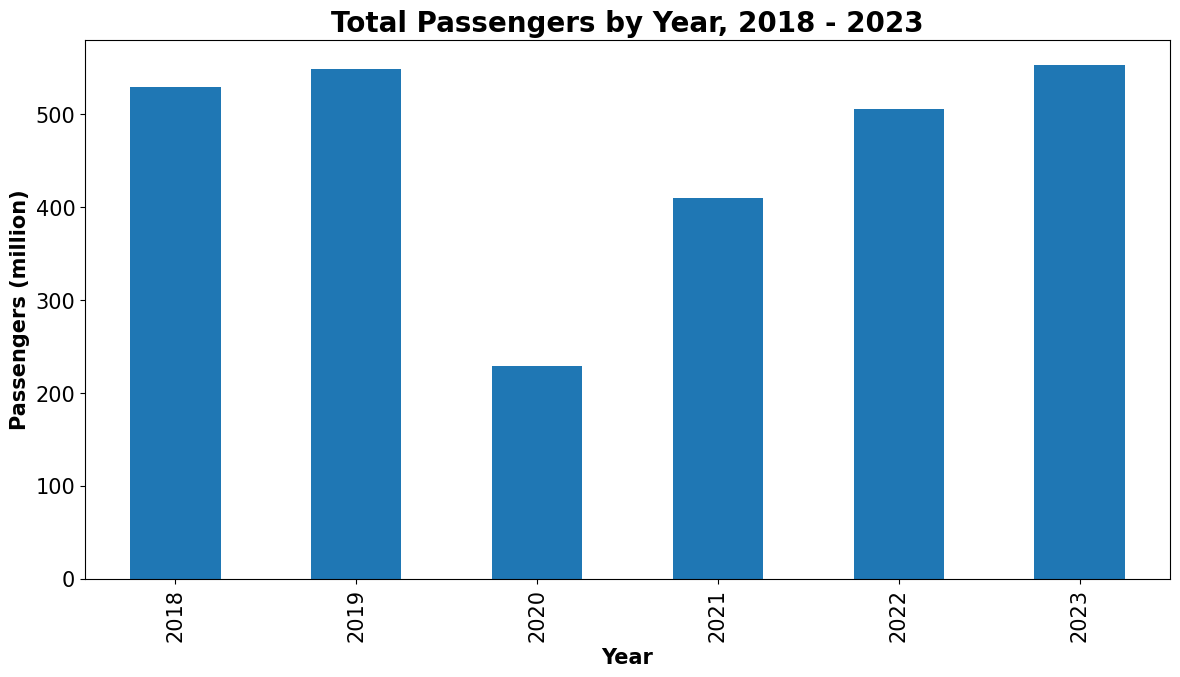

In [51]:
# Plot the number of passengers in a year by year
df_summary_year_sum = df_summary[['Year', 'Passengers']].groupby(['Year']).sum()
df_summary_year_sum['Passengers'] = df_summary_year_sum['Passengers']/1000000
df_summary_year_sum.rename(columns={'Passengers': 'Passengers (million)'})
display(df_summary_year_sum)

df_summary_year_sum.plot(kind='bar', legend=False, figsize=(14,7))
plt.title('Total Passengers by Year, 2018 - 2023', fontsize=20, weight='bold')
plt.xlabel('Year', fontsize=15, weight='bold')
plt.ylabel('Passengers (million)', fontsize=15, weight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

We can clearly see that when Covid started in 2020, the passenger volume dropped dramatically.

To get a better idea of the start and end of Covid-19, we restrict our time period to January 2020 to June 2023.

In [52]:
# Create a DataFrame for time period January 2020 to June 2023.
df_covid = df_summary.loc[(df_summary['Year-Month']>'2019-12') & (df_summary['Year-Month']<'2023-07')]
# display(df_covid.head())
# display(df_covid.tail())

array([<Axes: title={'center': 'Passengers'}, xlabel='Year,Month'>,
       <Axes: title={'center': 'Cancelled Flights'}, xlabel='Year,Month'>,
       <Axes: title={'center': 'No. of Flights'}, xlabel='Year,Month'>],
      dtype=object)

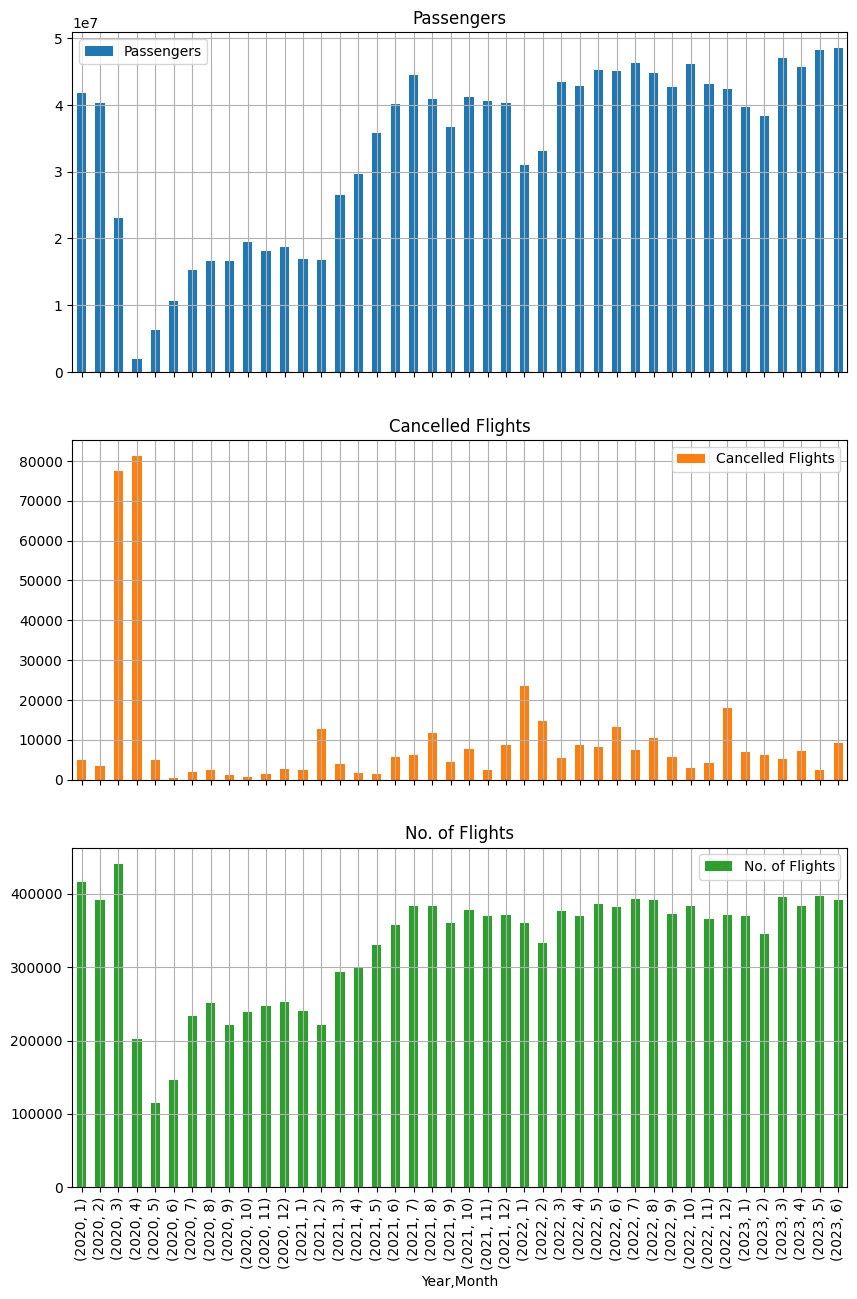

In [53]:
# Plot the number of flights, the number of passengers and the number of cancelled flights for every month between
# January of 2020 and June of 2023 
df_monthly_sums = df_covid[['Year',
                            'Month',
                            'Passengers',
                            'Cancelled Flights',
                            'No. of Flights']].groupby(['Year','Month']).sum()
# display(df_monthly_sums)

df_monthly_sums.plot(kind='bar', subplots=True, grid=True, figsize=(10,15))

In [54]:
# Plot the average cancellation percentage, arrival delays, and the inflation adjusted airfare by month from
# January of 2020 to June of 2023 
df_monthly_means = df_covid[['Year',
                             'Month',
                             'Passengers per Flight',
                             'Cancelled %',
                             'Average Delay (Minutes)',
                             'Inflation Adjusted Average Fare ($)']].groupby(['Year','Month']).mean().round(2)
# display(df_monthly_means)

# df_monthly_means.plot(subplots=True, grid=True, figsize=(10,15))

Looking at the `Passengers` column of the `df_monthly_sums` DataFrame (see above), passenger volumes recovered to its pre-Covid level around July/August of 2021 (not accounting for seasonality). Therefore, we define three time periads:
1. Before Covid from January 2018 to February 2020.
2. During Covid from March 2020 to July 2021.
3. After Covid from August 2021 to the end of 2023.

## 4.2. Gather Data for Before-Covid Time Period

In [55]:
# Create a DataFrame with data before Covid
df_before = df_summary.loc[df_summary['Year-Month']<'2020-03']
display(df_before.head())
display(df_before.tail())

,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($),Passengers per Flight
0,2018,1,1,2018-01,ATL,Atlanta,GA,30730,3232202,14.15,882,2.87,361.16,445.40,105.180670
1,2018,1,1,2018-01,AUS,Austin,TX,4713,483324,8.77,102,2.16,348.72,430.06,102.551241
2,2018,1,1,2018-01,BNA,Nashville,TN,5789,483139,10.65,179,3.09,351.81,433.87,83.458110
3,2018,1,1,2018-01,BOS,Boston,MA,11306,1027783,17.09,805,7.12,323.31,398.73,90.905979
4,2018,1,1,2018-01,BWI,Baltimore,MD,8560,882892,8.85,220,2.57,310.95,383.47,103.141589


,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($),Passengers per Flight
775,2020,1,2,2020-02,SAN,San Diego,CA,7484,862070,5.45,49,0.65,303.99,361.17,115.188402
776,2020,1,2,2020-02,SEA,Seattle,WA,14276,1538456,9.00,94,0.66,307.52,365.37,107.765200
777,2020,1,2,2020-02,SFO,San Francisco,CA,13197,1381182,10.77,116,0.88,371.76,441.70,104.658786
778,2020,1,2,2020-02,SLC,Salt Lake City,UT,9521,960656,8.92,27,0.28,364.52,433.09,100.898645
779,2020,1,2,2020-02,TPA,Tampa,FL,6551,883294,10.09,37,0.56,289.28,343.69,134.833461


In [56]:
# Sum Passengers, Cancelled Flights, and No. of Flights by year and month
df_before_monthly_sums = df_before[['Year',
                                    'Month',
                                    'Passengers',
                                    'Cancelled Flights',
                                    'No. of Flights']].groupby(['Year','Month']).sum()

# Divide large numbers by million and thousand as appropriate for easier analysis
df_before_monthly_sums['Passengers'] = df_before_monthly_sums['Passengers']/1000000
df_before_monthly_sums['Cancelled Flights'] = df_before_monthly_sums['Cancelled Flights']/1000
df_before_monthly_sums['No. of Flights'] = df_before_monthly_sums['No. of Flights']/1000

# display(df_before_monthly_sums.head())

# df_before_monthly_sums.plot(subplots=True, kind='bar', figsize=(10,15), legend=False)

Aggregate average passengers per flight, flight cancellation percentage, average arrival delay, and inflation adjusted fare for every month before Covid.

In [57]:
# Average Passengers per Flight, Cancellation Percentage, Average Arrival Delay, and Average Air Fare by month and year 
df_before_monthly_means = df_before[['Year',
                                     'Month',
                                     'Passengers per Flight',
                                     'Cancelled %',
                                     'Average Delay (Minutes)',
                                     'Inflation Adjusted Average Fare ($)']].groupby(['Year','Month']).mean().round(2)

# df_before_monthly_means.plot(subplots=True, kind='bar', figsize=(10,15), legend=False)

Combine sums and averages into one DataFrame

In [58]:
# Combine the sums and the means
df_before_monthly_combined = pd.merge(df_before_monthly_sums, df_before_monthly_means,
                                      how='inner',
                                      on=['Year', 'Month'])

# Rename columns
df_before_monthly_combined.rename(columns={'Passengers': 'Passengers (million)',
                                           'Cancelled Flights': 'Cancelled Flights (thousand)',
                                           'No. of Flights':'No. of Flights (thousand)',
                                           'Passengers per Flight': 'Average Passengers per Flight',
                                           'Cancelled %': 'Average Cancelled %',
                                           'Inflation Adjusted Average Fare ($)': 'Average Fare ($)'}, inplace=True)

display(df_before_monthly_combined)

Passengers (million)  Cancelled Flights (thousand)  \
Year Month                                                       
2018 1                 38.293821                        12.239   
     2                 36.816020                         6.546   
     3                 45.294209                        13.471   
     4                 44.028951                         4.537   
     5                 46.154923                         5.403   
     6                 47.664594                         7.451   
     7                 49.116224                         8.477   
     8                 48.009137                         9.345   
     9                 41.178066                         5.521   
     10                45.581132                         2.956   
     11                43.741537                         4.897   
     12                43.145257                         4.628   
2019 1                 39.418959                        12.351   
     2                 37.652872                        11.011   
     3                 47.319814                         8.705   
     4                 45.297528                         9.827   
     5                 48.232792                         8.726   
     6                 48.990006                         9.431   
     7                 50.582625                         9.607   
     8                 49.363206                         8.252   
     9                 43.314290                         7.081   
     10                47.313773                         3.523   
     11                43.807421                         3.352   
     12                47.003592                         4.258   
2020 1                 41.752105                         4.832   
     2                 40.355702                         3.520   

            No. of Flights (thousand)  Average Passengers per Flight  \
Year Month                                                             
2018 1                        397.081                          97.86   
     2                        362.103                         103.18   
     3                        424.653                         108.33   
     4                        414.163                         108.49   
     5                        428.869                         109.68   
     6                        433.159                         112.31   
     7                        445.505                         112.12   
     8                        445.919                         109.90   
     9                        406.934                         103.13   
     10                       426.404                         109.11   
     11                       405.270                         110.11   
     12                       411.630                         106.69   
2019 1                        404.607                          99.23   
     2                        369.028                         103.88   
     3                        435.410                         110.49   
     4                        421.847                         109.77   
     5                        438.306                         112.33   
     6                        435.857                         114.77   
     7                        450.155                         114.51   
     8                        452.497                         111.47   
     9                        417.061                         105.68   
     10                       437.781                         110.47   
     11                       412.563                         108.51   
     12                       427.720                         111.69   
2020 1                        416.302                         102.15   
     2                        391.911                         105.09   

            Average Cancelled %  Average Delay (Minutes)  Average Fare ($)  
Year Month                                                           

In [59]:
# Create a DataFrame with statistics for before Covid-19
df_describe_before = df_before_monthly_combined.describe()

## 4.3 Gather Data for During-Covid Time Period

**Note:** The Before-Covid and During-Covid periods overlap during January and February of 2020. This was a coding error that we did not have time to fix. It should not affect our findings and conclusions.

In [60]:
# Reduce the time period to January 2020 to August 2021
df_during = df_summary.loc[(df_summary['Year-Month']>'2019-12') & (df_summary['Year-Month']<'2021-08')]
display(df_during.head())
display(df_during.tail())

,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($),Passengers per Flight
720,2020,1,1,2020-01,ATL,Atlanta,GA,32197,3530955,8.06,79,0.25,359.58,427.22,109.667205
721,2020,1,1,2020-01,AUS,Austin,TX,5356,601201,7.87,34,0.63,317.02,376.66,112.248133
722,2020,1,1,2020-01,BNA,Nashville,TN,6784,631344,7.06,64,0.94,326.36,387.75,93.063679
723,2020,1,1,2020-01,BOS,Boston,MA,12333,1132859,8.13,51,0.41,324.85,385.96,91.855915
724,2020,1,1,2020-01,BWI,Baltimore,MD,7972,885685,6.16,66,0.83,308.59,366.64,111.099473


,Year,Quarter,Month,Year-Month,Airport,City,State,No. of Flights,Passengers,Average Delay (Minutes),Cancelled Flights,Cancelled %,Average Fare ($),Inflation Adjusted Average Fare ($),Passengers per Flight
1285,2021,3,7,2021-07,SAN,San Diego,CA,6600,896062,12.10,79,1.20,333.45,373.92,135.766970
1286,2021,3,7,2021-07,SEA,Seattle,WA,16616,1983177,10.20,111,0.67,306.79,344.02,119.353455
1287,2021,3,7,2021-07,SFO,San Francisco,CA,9456,1144477,15.10,82,0.87,399.11,447.55,121.031832
1288,2021,3,7,2021-07,SLC,Salt Lake City,UT,11511,1168165,14.48,58,0.50,318.74,357.43,101.482495
1289,2021,3,7,2021-07,TPA,Tampa,FL,5929,865301,20.61,181,3.05,265.03,297.19,145.943835


Aggregate total passengers, number of flights, and cancelled flights for every month during Covid.

In [61]:
# Sum Passengers, Cancelled Flights, and No. of Flights by year and month
df_during_monthly_sums = df_during[['Year',
                                    'Month',
                                    'Passengers',
                                    'Cancelled Flights',
                                    'No. of Flights']].groupby(['Year','Month']).sum()
# display(df_during_monthly_sums)

# Divide large numbers by million and thousand as appropriate for easier analysis
df_during_monthly_sums['Passengers'] = df_during_monthly_sums['Passengers']/1000000
df_during_monthly_sums['Cancelled Flights'] = df_during_monthly_sums['Cancelled Flights']/1000
df_during_monthly_sums['No. of Flights'] = df_during_monthly_sums['No. of Flights']/1000

# df_during_monthly_sums.plot(kind = 'bar', subplots=True, figsize=(10,15), legend=False)

Aggregate average passengers per flight, flight cancellation percentage, average arrival delay, and inflation adjusted fare for every month during Covid.

In [62]:
# Average Passengers per Flight, Cancellation Percentage, Average Arrival Delay, and Average Air Fare by month and year 
df_during_monthly_means = df_during[['Year',
                                     'Month',
                                     'Passengers per Flight',
                                     'Cancelled %',
                                     'Average Delay (Minutes)',
                                     'Inflation Adjusted Average Fare ($)']].groupby(['Year','Month']).mean().round(2)

# df_during_monthly_means.plot(kind = 'bar', subplots=True, figsize=(10,15), legend=False)

Combine sums and averages into one DataFrame

In [63]:
# Combine the sums and the means
df_during_monthly_combined = pd.merge(df_during_monthly_sums, df_during_monthly_means,
                                      how='inner',
                                      on=['Year', 'Month'])
df_during_monthly_combined.rename(columns={'Passengers': 'Passengers (million)',
                                           'Cancelled Flights': 'Cancelled Flights (thousand)',
                                           'No. of Flights':'No. of Flights (thousand)',
                                           'Passengers per Flight': 'Average Passengers per Flight',
                                           'Cancelled %': 'Average Cancelled %',
                                           'Inflation Adjusted Average Fare ($)': 'Average Fare ($)'}, inplace=True)

display(df_during_monthly_combined)

Passengers (million)  Cancelled Flights (thousand)  \
Year Month                                                       
2020 1                 41.752105                         4.832   
     2                 40.355702                         3.520   
     3                 23.034636                        77.451   
     4                  1.998232                        81.236   
     5                  6.311191                         4.950   
     6                 10.659489                         0.514   
     7                 15.291508                         1.849   
     8                 16.600188                         2.309   
     9                 16.569602                         1.246   
     10                19.410767                         0.640   
     11                18.090106                         1.374   
     12                18.699976                         2.687   
2021 1                 16.852087                         2.443   
     2                 16.770353                        12.679   
     3                 26.546993                         3.799   
     4                 29.632600                         1.627   
     5                 35.832899                         1.370   
     6                 40.142526                         5.780   
     7                 44.467435                         6.156   

            No. of Flights (thousand)  Average Passengers per Flight  \
Year Month                                                             
2020 1                        416.302                         102.15   
     2                        391.911                         105.09   
     3                        441.010                          53.15   
     4                        202.032                           9.55   
     5                        115.353                          57.09   
     6                        146.739                          72.45   
     7                        233.581                          63.48   
     8                        251.259                          65.64   
     9                        220.681                          76.55   
     10                       238.364                          83.16   
     11                       247.205                          74.09   
     12                       252.092                          76.03   
2021 1                        239.912                          72.03   
     2                        221.155                          77.63   
     3                        293.591                          92.08   
     4                        299.702                         101.02   
     5                        330.051                         110.75   
     6                        357.760                         114.52   
     7                        383.616                         118.40   

            Average Cancelled %  Average Delay (Minutes)  Average Fare ($)  
Year Month                                                                  
2020 1                     1.08                     9.57            397.53  
     2                     0.82                    10.81            397.53  
     3                    17.68                     5.61            397.53  
     4                    41.57                     2.03            315.80  
     5                     5.09                     2.65            315.80  
     6                     0.35                     4.09            315.80  
     7                     0.96                     5.83            281.69  
     8                     1.08                     4.87            281.69  
     9                     0.50                     3.87            281.69  
     10                    0.20                     5.25            296.78  
     11                    0.60                     4.93            296.78  
     12                    1.24                     7.71            296.78  
2021 1                     1.06   

In [64]:
# Create a DataFrame with statistics for during Covid-19
df_describe_during = df_during_monthly_combined.describe()

## 4.4 Gather Data for After-Covid Time Period

In [65]:
# Reduce the time period to July 2021 and beyond. i.e. after Covid
df_after = df_summary.loc[df_summary['Year-Month']>'2021-07']
# display(df_after.head())
# display(df_after.tail())

Aggregate total passengers, number of flights, and cancelled flights for every month after Covid.

In [66]:
# Sum Passengers, Cancelled Flights, and No. of Flights by year and month
df_after_monthly_sums = df_after[['Year',
                                  'Month',
                                  'Passengers',
                                  'No. of Flights',
                                  'Cancelled Flights']].groupby(['Year','Month']).sum()

# Divide large numbers by million and thousand as appropriate for easier analysis
df_after_monthly_sums['Passengers'] = df_after_monthly_sums['Passengers']/1000000
df_after_monthly_sums['Cancelled Flights'] = df_after_monthly_sums['Cancelled Flights']/1000
df_after_monthly_sums['No. of Flights'] = df_after_monthly_sums['No. of Flights']/1000

# df_after_monthly_sums.plot(subplots=True, kind='bar', figsize=(10,15), legend=False)

Aggregate average passengers per flight, flight cancellation percentage, average arrival delay, and inflation adjusted fare for every month after Covid.

In [67]:
# Average Passengers per Flight, Cancellation Percentage, Average Arrival Delay, and Average Air Fare by month and year 
df_after_monthly_means = df_after[['Year',
                                   'Month',
                                   'Passengers per Flight',
                                   'Cancelled %',
                                   'Average Delay (Minutes)',
                                   'Inflation Adjusted Average Fare ($)']].groupby(['Year','Month']).mean().round(2)

# df_after_monthly_means.plot(subplots=True, kind='bar', figsize=(10,15), legend=False)

Combine sums and averages into one DataFrame

In [68]:
# Combine the sums and the means
df_after_monthly_combined = pd.merge(df_after_monthly_sums, df_after_monthly_means,
                                      how='inner',
                                      on=['Year', 'Month'])
df_after_monthly_combined.rename(columns={'Passengers' : 'Passengers (million)',
                                          'Cancelled Flights': 'Cancelled Flights (thousand)',
                                          'No. of Flights': 'No. of Flights (thousand)',
                                          'Passengers per Flight': 'Average Passengers per Flight',
                                          'Cancelled %': 'Average Cancelled %',
                                          'Inflation Adjusted Average Fare ($)': 'Average Fare ($)'}, inplace=True)

display(df_after_monthly_combined.head())

Passengers (million)  No. of Flights (thousand)  \
Year Month                                                    
2021 8                 40.913550                    383.994   
     9                 36.749109                    360.233   
     10                41.151409                    378.322   
     11                40.670798                    369.676   
     12                40.318229                    370.531   

            Cancelled Flights (thousand)  Average Passengers per Flight  \
Year Month                                                                
2021 8                            11.578                         108.99   
     9                             4.476                         103.36   
     10                            7.564                         110.25   
     11                            2.465                         111.33   
     12                            8.581                         109.84   

            Average Cancelled %  Average Delay (Minutes)  Average Fare ($)  
Year Month                                                                  
2021 8                     2.96                    16.68            346.10  
     9                     1.38                    10.16            346.10  
     10                    1.95                    12.17            354.91  
     11                    0.64                     9.84            354.91  
     12                    2.30                    14.89            354.91

In [69]:
# Create a DataFrame with statistics for after Covid-19
df_describe_after = df_after_monthly_combined.describe()

## 4.5 Generate Plots for During-Covid

Generate a plot illustrating the effects to passenger volumes during Covid

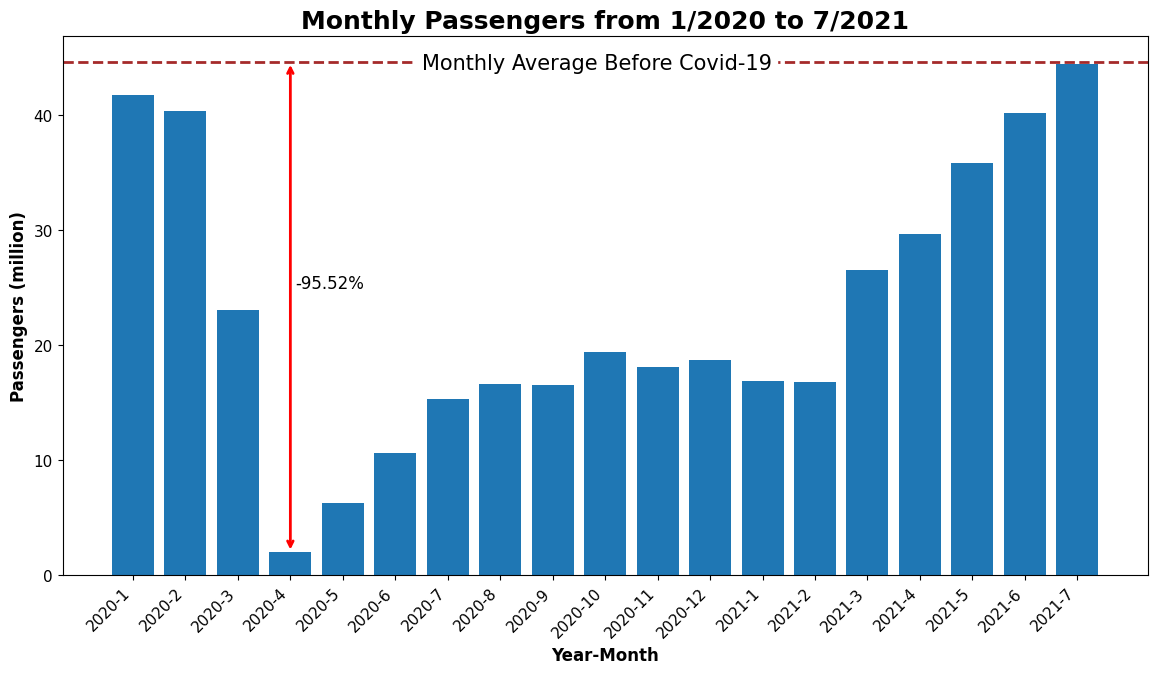

In [70]:
# Sources to code how to draw a vertical line:
# https://stackoverflow.com/questions/51976562/plotting-a-vertical-double-headed-arrow-in-matplotlib
# https://stackoverflow.com/questions/58009433/matplotlib-annotate-plot-with-vertical-arrow-and-centered-text

#display(df_describe_before)
# Retrieve values needed to calculate the percentage drop in passengers volume
mean_passengers_before = df_describe_before.loc['mean', 'Passengers (million)']
min_passengers_during = min(df_during_monthly_combined['Passengers (million)'])
# print(mean_passengers_before)
# print(min_passengers_during)

# Calculate the percentage drop
percentage_drop = (mean_passengers_before-min_passengers_during)/mean_passengers_before*100

# Build the plot
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

x = [f'{df_during_monthly_combined.index.get_level_values(0)[i]}-{df_during_monthly_combined.index.get_level_values(level=1)[i]}' for i in range(len(df_during_monthly_combined.index))]
y = df_during_monthly_combined['Passengers (million)']

plt.title('Monthly Passengers from 1/2020 to 7/2021', fontsize=18, weight='bold')
plt.xlabel('Year-Month', fontsize=12, weight='bold')
plt.ylabel('Passengers (million)', fontsize=12, weight='bold')
plt.axhline(y = mean_passengers_before, color = 'brown', linestyle = 'dashed', lw=2)
plt.text(s='Monthly Average Before Covid-19', x=5.5, y=44, fontsize=15, bbox=dict(color='white', alpha=1))
plt.text(s=f'-{percentage_drop:.2f}%', x=3.1, y=25, fontsize=12)
plt.xticks(np.arange(19), x, fontsize=11, rotation=45, horizontalalignment='right', verticalalignment='top')
plt.yticks(fontsize=11)
plt.bar(x, y)

ax.annotate('', xy=(x[3],min_passengers_during), xycoords='data', xytext=(x[3], mean_passengers_before), textcoords='data', arrowprops=dict(arrowstyle="<->", color='red', lw=2))

plt.show()

Generate a plot illustrating the effects to the number of flights during Covid

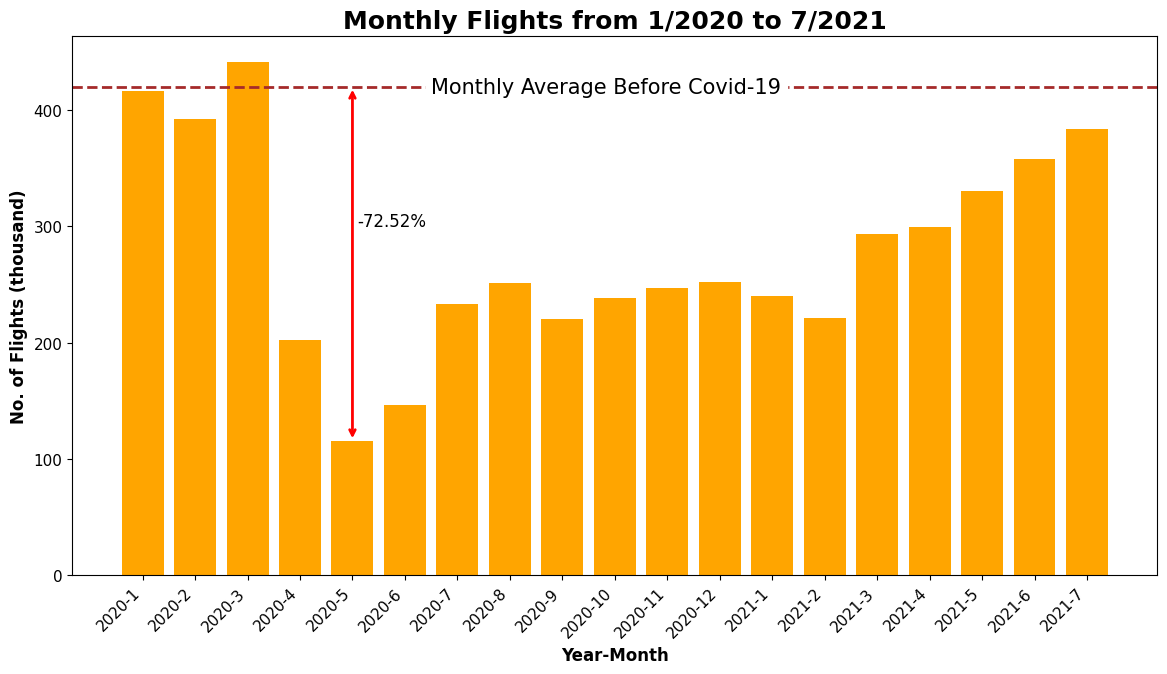

In [71]:
# Retrieve values needed to calculate the percentage drop in passengers volume
mean_flights_before = df_describe_before.loc['mean', 'No. of Flights (thousand)']
min_flights_during = min(df_during_monthly_combined['No. of Flights (thousand)'])
# print(mean_flights_before)
# print(min_flights_during)

# Calculate the percentage drop
percentage_drop = (mean_flights_before-min_flights_during)/mean_flights_before*100

# Build the plot
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

x = [f'{df_during_monthly_combined.index.get_level_values(0)[i]}-{df_during_monthly_combined.index.get_level_values(level=1)[i]}' for i in range(len(df_during_monthly_combined.index))]
y = df_during_monthly_combined['No. of Flights (thousand)']


plt.title('Monthly Flights from 1/2020 to 7/2021', fontsize=18, weight='bold')
plt.xlabel('Year-Month', fontsize=12, weight='bold')
plt.ylabel('No. of Flights (thousand)', fontsize=12, weight='bold')
plt.axhline(y = mean_flights_before, color = 'brown', linestyle = 'dashed', lw=2)
plt.text(s='Monthly Average Before Covid-19', x=5.5, y=mean_flights_before-5, fontsize=15, bbox=dict(color='white', alpha=1))
plt.text(s=f'-{percentage_drop:.2f}%', x=4.1, y=300, fontsize=12)
plt.xticks(np.arange(19), x, fontsize=11, rotation=45, horizontalalignment='right', verticalalignment='top')
plt.yticks(fontsize=11)
plt.bar(x, y, color='orange')

ax.annotate('', xy=(x[4],min_flights_during), xycoords='data', xytext=(x[4], mean_flights_before), textcoords='data', arrowprops=dict(arrowstyle="<->", color='red', lw=2))

plt.show()

Generate a plot illustrating the effects to the the average airfare during Covid

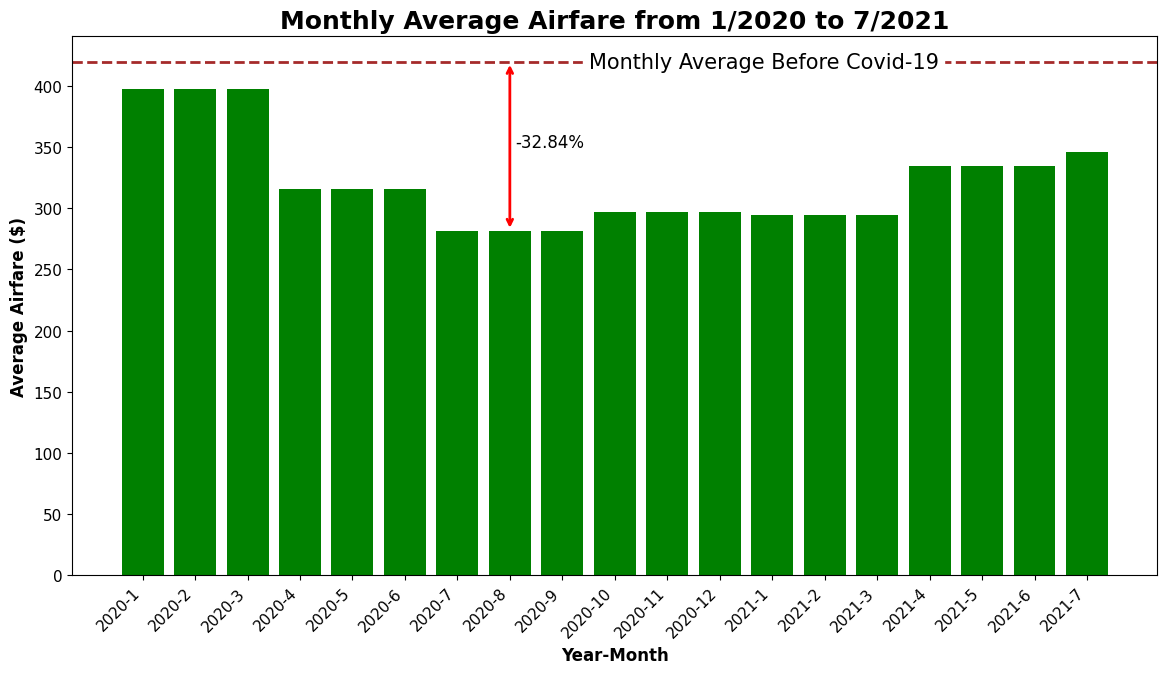

In [72]:
# Retrieve values needed to calculate the percentage drop in passengers volume
mean_airfare_before = df_describe_before.loc['mean', 'Average Fare ($)']
min_airfare_during = min(df_during_monthly_combined['Average Fare ($)'])
# print(mean_airfare_before)
# print(min_airfare_during)

# Calculate the percentage drop
percentage_drop = (mean_airfare_before-min_airfare_during)/mean_airfare_before*100

# Build the plot
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

x = [f'{df_during_monthly_combined.index.get_level_values(0)[i]}-{df_during_monthly_combined.index.get_level_values(level=1)[i]}' for i in range(len(df_during_monthly_combined.index))]
y = df_during_monthly_combined['Average Fare ($)']


plt.title('Monthly Average Airfare from 1/2020 to 7/2021', fontsize=18, weight='bold')
plt.xlabel('Year-Month', fontsize=12, weight='bold')
plt.ylabel('Average Airfare ($)', fontsize=12, weight='bold')
plt.axhline(y = mean_airfare_before, color = 'brown', linestyle = 'dashed', lw=2)
plt.text(s='Monthly Average Before Covid-19', x=8.5, y=mean_airfare_before-5, fontsize=15, bbox=dict(color='white', alpha=1))
plt.text(s=f'-{percentage_drop:.2f}%', x=7.1, y=350, fontsize=12)
plt.xticks(np.arange(19), x, fontsize=11, rotation=45, horizontalalignment='right', verticalalignment='top')
plt.yticks(fontsize=11)
plt.bar(x, y, color='green')

ax.annotate('', xy=(x[7],min_airfare_during), xycoords='data', xytext=(x[7], mean_airfare_before), textcoords='data', arrowprops=dict(arrowstyle="<->", color='red', lw=2))

plt.show()

### Conclusion
Airfare changed much less than passenger volume or total number of flights.

Create comparison plot for passenger volume, cancelled flights, and number of flights by month at the beginning of the Covid-19 period to understand how the airlines adjusted

Passengers (million)  Cancelled Flights (thousand)  \
Year Month                                                       
2020 1                 41.752105                         4.832   
     2                 40.355702                         3.520   
     3                 23.034636                        77.451   
     4                  1.998232                        81.236   
     5                  6.311191                         4.950   
     6                 10.659489                         0.514   

            No. of Flights (thousand)  Average Passengers per Flight  \
Year Month                                                             
2020 1                        416.302                         102.15   
     2                        391.911                         105.09   
     3                        441.010                          53.15   
     4                        202.032                           9.55   
     5                        115.353                          57.09   
     6                        146.739                          72.45   

            Average Cancelled %  Average Delay (Minutes)  Average Fare ($)  
Year Month                                                                  
2020 1                     1.08                     9.57            397.53  
     2                     0.82                    10.81            397.53  
     3                    17.68                     5.61            397.53  
     4                    41.57                     2.03            315.80  
     5                     5.09                     2.65            315.80  
     6                     0.35                     4.09            315.80

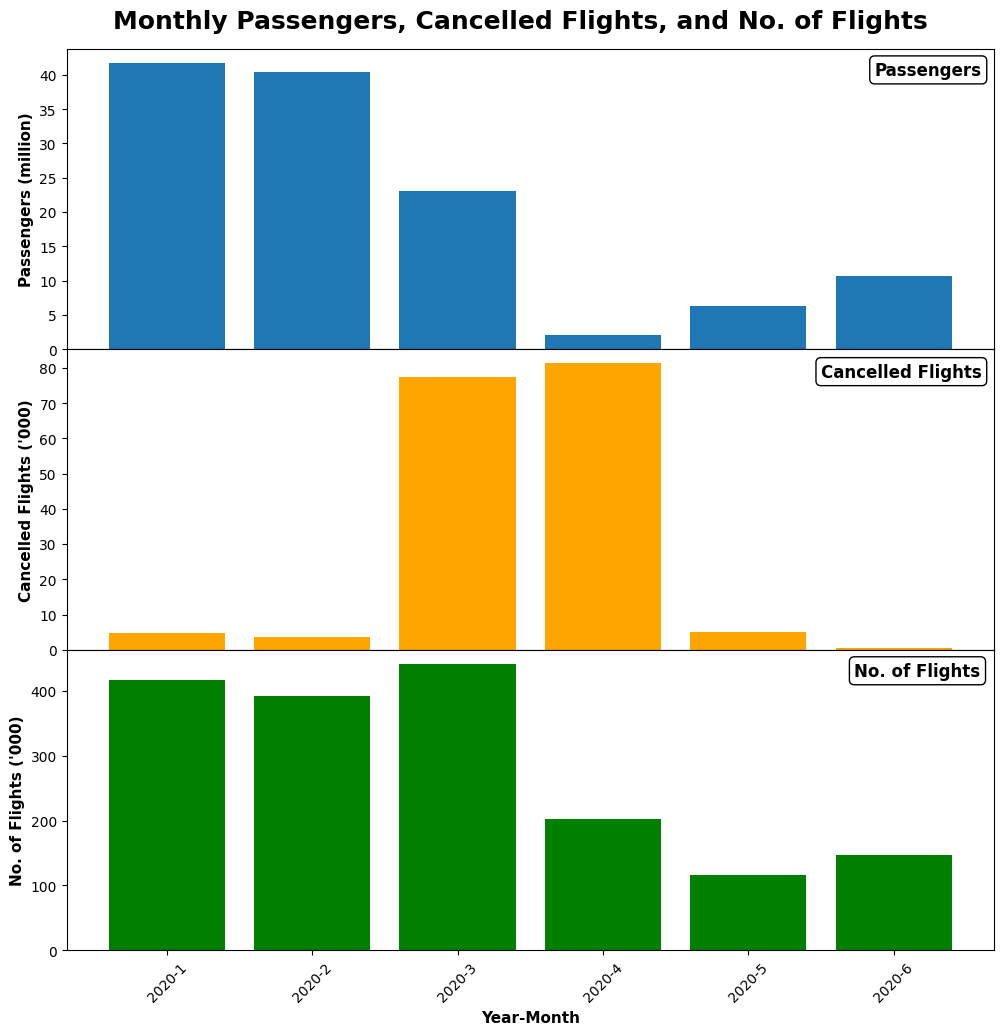

In [73]:
# Reduce timeframe to the beginning of Covid-19 period
df_during_reduced = df_during_monthly_combined.iloc[0:6, :]
display(df_during_reduced)

# Build the plot
fig, axs = plt.subplots(3, sharex=True, figsize=(10,10))
fig.suptitle('Monthly Passengers, Cancelled Flights, and No. of Flights', fontsize=18, weight='bold')
fig.tight_layout()
fig.subplots_adjust(hspace=0)
plt.xticks(rotation=45)
plt.xlabel('Year-Month', fontsize=11, weight='bold')
x = [f'{df_during_reduced.index.get_level_values(0)[i]}-{df_during_reduced.index.get_level_values(level=1)[i]}' for i in range(len(df_during_reduced.index))]
axs[0].bar(x, df_during_reduced['Passengers (million)'], label='Passengers')
axs[0].text(s='Passengers', fontsize=12, weight='bold', x=4.87, y=40.0, bbox=dict(boxstyle='round', facecolor='white'))
axs[0].set_ylabel('Passengers (million)', fontsize=11, weight='bold')
axs[1].bar(x, df_during_reduced['Cancelled Flights (thousand)'], color='orange', label='Cancelled Flights')
axs[1].text(s="Cancelled Flights", fontsize=12, weight='bold', x=4.5, y=77.5, bbox=dict(boxstyle='round', facecolor='white'))
axs[1].set_ylabel("Cancelled Flights ('000)", fontsize=11, weight='bold')
axs[2].bar(x, df_during_reduced['No. of Flights (thousand)'], color='green', label="No. of Flights")
axs[2].text(s="No. of Flights", fontsize=12, weight='bold', x=4.73, y=423.0, bbox=dict(boxstyle='round', facecolor='white'))
axs[2].set_ylabel("No. of Flights ('000)", fontsize=11, weight='bold')
plt.show()

Create comparison plot for passenger volume and average airfare to see when airfares dropped as compared to passenger volume

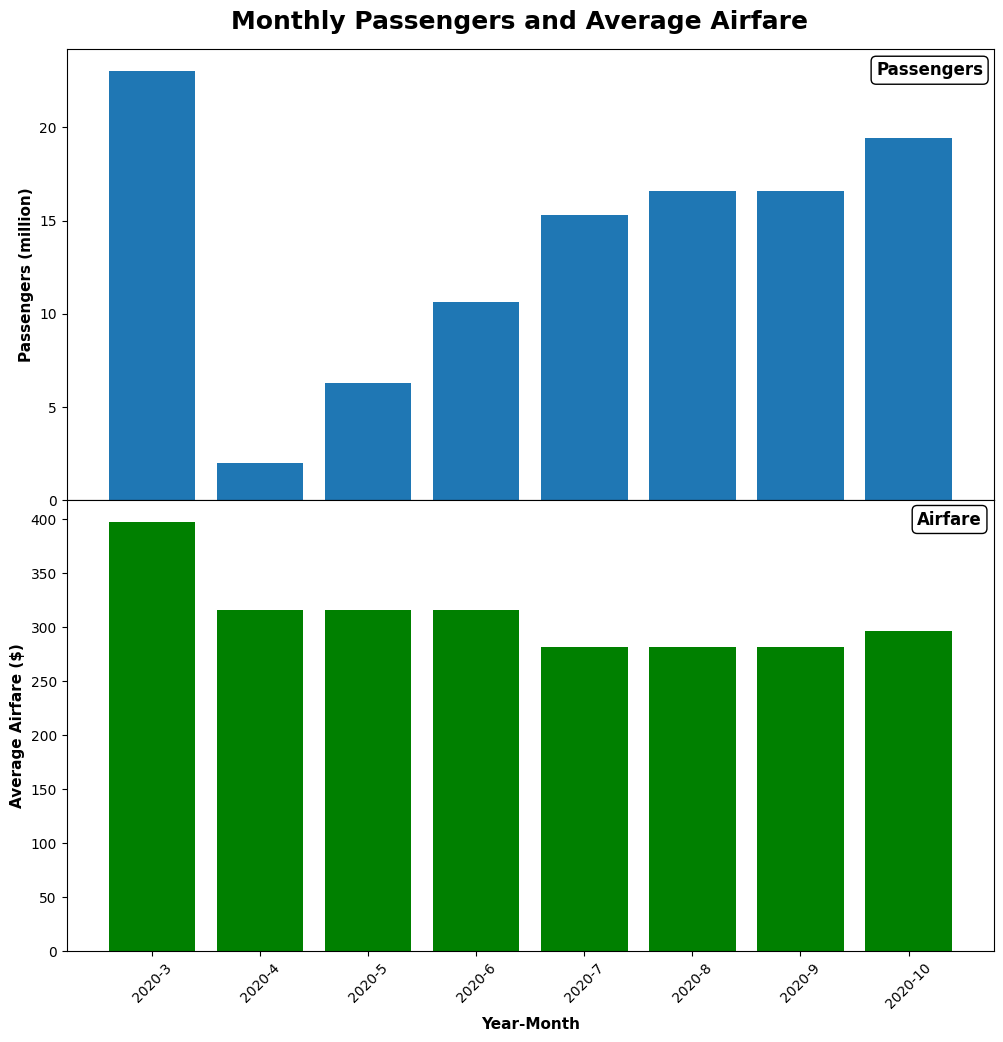

In [74]:
# Reduce timeframe to see a comparison between when the passenger volume reached a minumum and when airfare reached a minimum
df_during_reduced = df_during_monthly_combined.iloc[2:10, :]
# display(df_during_reduced)

# Build the plot
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10,10))
fig.suptitle('Monthly Passengers and Average Airfare', fontsize=18, weight='bold')
fig.tight_layout()
fig.subplots_adjust(hspace=0)
plt.xticks(rotation=45)
plt.xlabel('Year-Month', fontsize=11, weight='bold')
x = [f'{df_during_reduced.index.get_level_values(0)[i]}-{df_during_reduced.index.get_level_values(level=1)[i]}' for i in range(len(df_during_reduced.index))]
ax1.bar(x, df_during_reduced['Passengers (million)'], label='Passengers')
ax1.text(s='Passengers', fontsize=12, weight='bold', x=6.7, y=22.8, bbox=dict(boxstyle='round', facecolor='white'))
ax1.set_ylabel('Passengers (million)', fontsize=11, weight='bold')
ax2.bar(x, df_during_reduced['Average Fare ($)'], color='green', label='Airfare')
ax2.text(s="Airfare", fontsize=12, weight='bold', x=7.08, y=395.0, bbox=dict(boxstyle='round', facecolor='white'))
ax2.set_ylabel("Average Airfare ($)", fontsize=11, weight='bold')
plt.show()

### Conclusion
Airfares reached their minimum three months after passenger volume reached its minimum.
We would need monthly airfare data instead of quarterly airfare data to more accurately determine the time lag between when passenger volume reached a minimum and when airfare reached a minimum.

## 4.6 Create Correlation Matrices for Before, During, and After Covid-19

In [75]:
# Create correlation matrix for before Covid-19
df_corr_matrix_before = df_before_monthly_combined.corr()
# print('Correlation Matrix, Before')
# display(df_corr_matrix_before)

In [76]:
# Reduce the correlation matrix to metrics that show the most change
df_corr_reduced_before = df_corr_matrix_before[['Passengers (million)', 'Average Delay (Minutes)', 'Average Fare ($)']].loc[['Passengers (million)', 'Average Delay (Minutes)', 'Average Fare ($)']]

# Rename indexes and columns to make plotting easier
df_corr_reduced_before.rename(columns={'Passengers (million)': 'Passengers',
                                      'Average Delay (Minutes)': 'Delay',
                                      'Average Fare ($)': 'Fare'},
                              index={'Passengers (million)': 'Passengers',
                                      'Average Delay (Minutes)': 'Delay',
                                      'Average Fare ($)': 'Fare'},         
                              inplace=True)
display(df_corr_reduced_before)

,Passengers,Delay,Fare
Passengers,1.000000,0.485510,-0.047296
Delay,0.485510,1.000000,0.064729
Fare,-0.047296,0.064729,1.000000


In [77]:
# Create correlation matrix for during Covid-19
df_corr_matrix_during = df_during_monthly_combined.corr()
# print('Correlation Matrix, During')
# display(df_corr_matrix_during)

In [78]:
# Reduce the correlation matrix to metrics that show the most change
df_corr_reduced_during = df_corr_matrix_during[['Passengers (million)', 'Average Delay (Minutes)', 'Average Fare ($)']].loc[['Passengers (million)', 'Average Delay (Minutes)', 'Average Fare ($)']]

# Rename indexes and columns to make plotting easier
df_corr_reduced_during.rename(columns={'Passengers (million)': 'Passengers',
                                      'Average Delay (Minutes)': 'Delay',
                                      'Average Fare ($)': 'Fare'},
                              index={'Passengers (million)': 'Passengers',
                                      'Average Delay (Minutes)': 'Delay',
                                      'Average Fare ($)': 'Fare'},
                              inplace=True)
display(df_corr_reduced_during)

,Passengers,Delay,Fare
Passengers,1.000000,0.833077,0.620925
Delay,0.833077,1.000000,0.379298
Fare,0.620925,0.379298,1.000000


In [79]:
# Create correlation matrix for during Covid-19
df_corr_matrix_after = df_after_monthly_combined.corr()
# print('Correlation Matrix, After')
# display(df_corr_matrix_after)

In [80]:
# Reduce the correlation matrix to metrics that show the most change
df_corr_reduced_after = df_corr_matrix_after[['Passengers (million)', 'Average Delay (Minutes)', 'Average Fare ($)']].loc[['Passengers (million)', 'Average Delay (Minutes)', 'Average Fare ($)']]

# Rename indexes and columns to make plotting easier
df_corr_reduced_after.rename(columns={'Passengers (million)': 'Passengers',
                                      'Average Delay (Minutes)': 'Delay',
                                      'Average Fare ($)': 'Fare'},
                             index={'Passengers (million)': 'Passengers',
                                      'Average Delay (Minutes)': 'Delay',
                                      'Average Fare ($)': 'Fare'},
                             inplace=True)
display(df_corr_reduced_after)

,Passengers,Delay,Fare
Passengers,1.000000,0.309495,0.436482
Delay,0.309495,1.000000,0.209828
Fare,0.436482,0.209828,1.000000


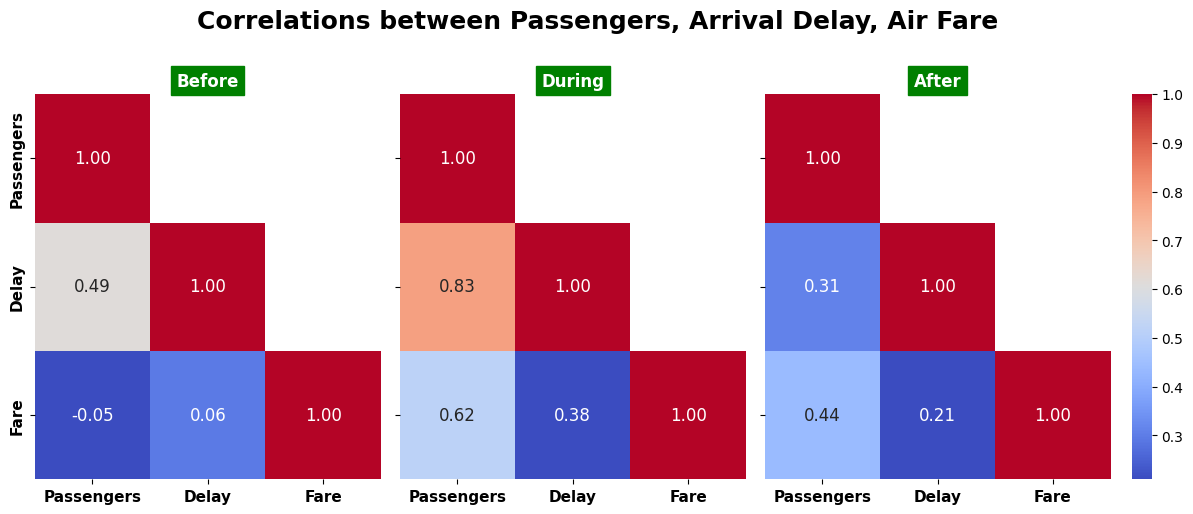

In [81]:
# Create a comparison plot between reduced correlation matrices for before, during, and after Covid-19
labels = df_corr_reduced_before.index

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, gridspec_kw={'width_ratios': [1, 1, 1.25]}, sharey=True, figsize=(15,5))
fig.subplots_adjust(wspace=0.05)
fig.suptitle('Correlations between Passengers, Arrival Delay, Air Fare', fontsize=18, weight='bold', y=1.05)
plt.yticks(fontsize=11, weight='bold')
mask = np.triu(df_corr_reduced_before, k=1)
sns.heatmap(df_corr_reduced_before, mask=mask, ax=ax1, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='coolwarm', cbar=False)
mask = np.triu(df_corr_reduced_during, k=1)
sns.heatmap(df_corr_reduced_during, mask=mask, ax=ax2, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='coolwarm', cbar=False)
mask = np.triu(df_corr_reduced_after, k=1)
sns.heatmap(df_corr_reduced_after, mask=mask, ax=ax3, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='coolwarm')
ax1.set_title('Before', fontsize=12, weight='bold', backgroundcolor='green', color='white')
ax1.set_xticklabels(labels, fontsize=11, weight='bold')
ax1.set_yticklabels(labels, fontsize=11, weight='bold')
ax2.set_title('During', fontsize=12, weight='bold', backgroundcolor='green', color='white')
ax2.set_xticklabels(labels, fontsize=11, weight='bold')
ax3.set_title('After', fontsize=12, weight='bold', backgroundcolor='green', color='white')
ax3.set_xticklabels(labels, fontsize=11, weight='bold')
plt.show()

## 4.7. Compare Statistics berfore, during, and after Covid-19

In [82]:
print('Statistics before')
display(df_describe_before.round(2))
print('Statistics during')
display(df_describe_during.round(2))
print('Statistics after')
display(df_describe_after.round(2))

Statistics before


,Passengers (million),Cancelled Flights (thousand),No. of Flights (thousand),Average Passengers per Flight,Average Cancelled %,Average Delay (Minutes),Average Fare ($)
count,26.00,26.00,26.00,26.00,26.00,26.00,26.00
mean,44.59,7.31,419.72,108.11,1.71,13.74,419.44
std,3.88,3.06,22.69,4.42,0.79,2.70,10.13
min,36.82,2.96,362.10,97.86,0.63,9.57,397.53
25%,42.10,4.68,408.11,105.24,1.08,11.58,410.98
50%,45.30,7.27,423.25,109.40,1.75,13.20,421.96
75%,47.58,9.41,435.75,111.22,2.09,15.64,425.47
max,50.58,13.47,452.50,114.77,3.43,18.82,434.25


Statistics during


,Passengers (million),Cancelled Flights (thousand),No. of Flights (thousand),Average Passengers per Flight,Average Cancelled %,Average Delay (Minutes),Average Fare ($)
count,19.00,19.00,19.00,19.00,19.00,19.00,19.00
mean,23.11,11.39,278.02,80.26,4.41,7.57,321.47
std,12.41,24.12,89.11,26.04,9.86,4.49,38.97
min,2.00,0.51,115.35,9.55,0.20,2.03,281.69
25%,16.58,1.50,227.37,68.84,0.60,4.90,294.41
50%,18.70,2.69,251.26,76.55,1.06,6.47,315.80
75%,32.73,5.36,343.91,101.58,1.67,9.31,334.41
max,44.47,81.24,441.01,118.40,41.57,19.03,397.53


Statistics after


,Passengers (million),No. of Flights (thousand),Cancelled Flights (thousand),Average Passengers per Flight,Average Cancelled %,Average Delay (Minutes),Average Fare ($)
count,29.00,29.00,29.00,29.00,29.00,29.00,26.00
mean,43.39,379.89,7.60,114.82,2.05,14.93,379.86
std,4.60,17.59,5.13,7.98,1.45,3.57,23.77
min,30.95,332.41,0.46,86.49,0.12,9.28,346.10
25%,40.91,369.68,4.48,111.33,1.31,12.17,354.91
50%,44.77,383.58,6.88,117.14,1.85,15.10,388.35
75%,46.24,391.49,9.06,119.57,2.49,16.77,393.47
max,50.25,409.71,23.57,124.70,6.71,24.19,414.84


Create boxplot comparing Average Passengers per Flight before, during, and after Covid-19

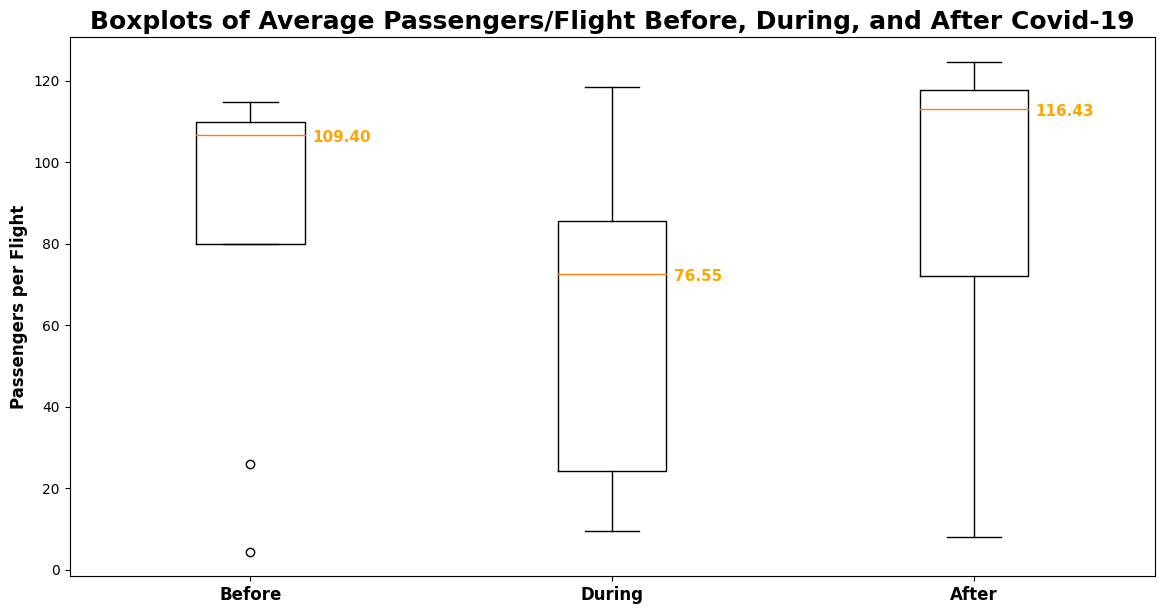

In [83]:
# Create boxplot comparing Average Passengers per Flight
plt.figure(figsize=(14,7))
plt.title('Boxplots of Average Passengers/Flight Before, During, and After Covid-19', fontsize=18, weight='bold')
plt.ylabel('Passengers per Flight', fontsize=12, weight='bold')
plt.boxplot([df_describe_before['Average Passengers per Flight'], df_describe_during['Average Passengers per Flight'], df_describe_after['Average Passengers per Flight']])
plt.xticks([1, 2, 3], ['Before', 'During', 'After'], fontsize=12, weight='bold')
plt.text(1.17, 105.0, '109.40', fontsize=11, color='orange', weight='bold')
plt.text(2.17, 71.0, '76.55', fontsize=11, color='orange', weight='bold')
plt.text(3.17, 111.5, '116.43', fontsize=11, color='orange', weight='bold')
plt.show()

Create boxplot comparing Average Arrival Delay before, during, and after Covid-19

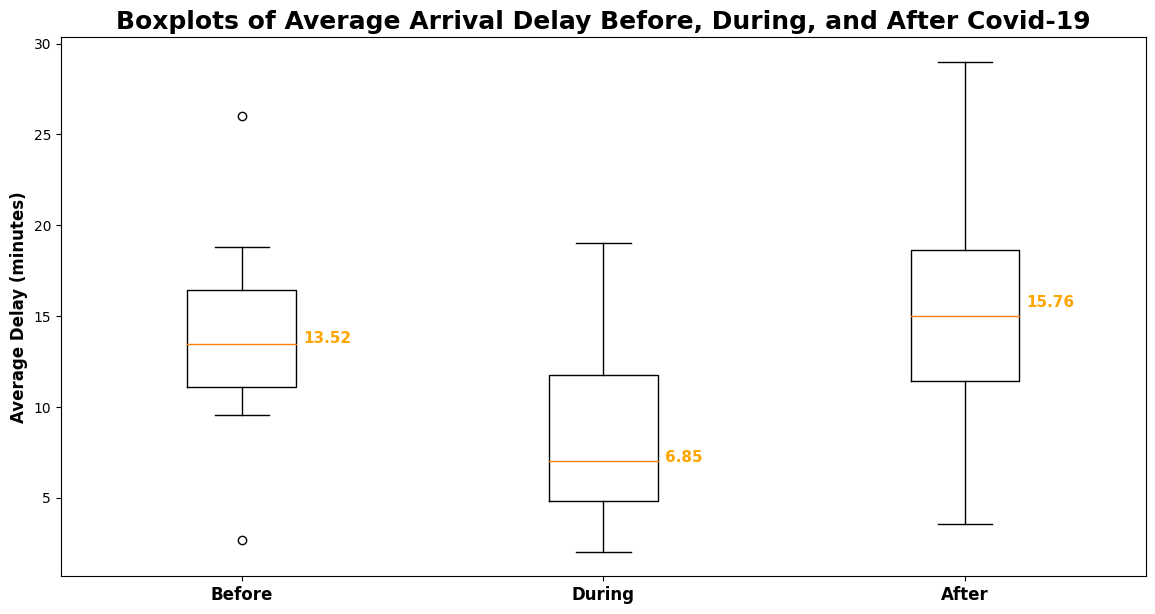

In [84]:
# Create boxplot comparing Average Arrival Delay
plt.figure(figsize=(14,7))
plt.title('Boxplots of Average Arrival Delay Before, During, and After Covid-19', fontsize=18, weight='bold')
plt.ylabel('Average Delay (minutes)', fontsize=12, weight='bold')
plt.boxplot([df_describe_before['Average Delay (Minutes)'], df_describe_during['Average Delay (Minutes)'], df_describe_after['Average Delay (Minutes)']])
plt.xticks([1, 2, 3], ['Before', 'During', 'After'], fontsize=12, weight='bold')
plt.text(1.17, 13.52, '13.52', fontsize=11, color='orange', weight='bold')
plt.text(2.17, 7.0, '6.85', fontsize=11, color='orange', weight='bold')
plt.text(3.17, 15.5, '15.76', fontsize=11, color='orange', weight='bold')
plt.show()

Create boxplot comparing Average Airfare before, during, and after Covid-19

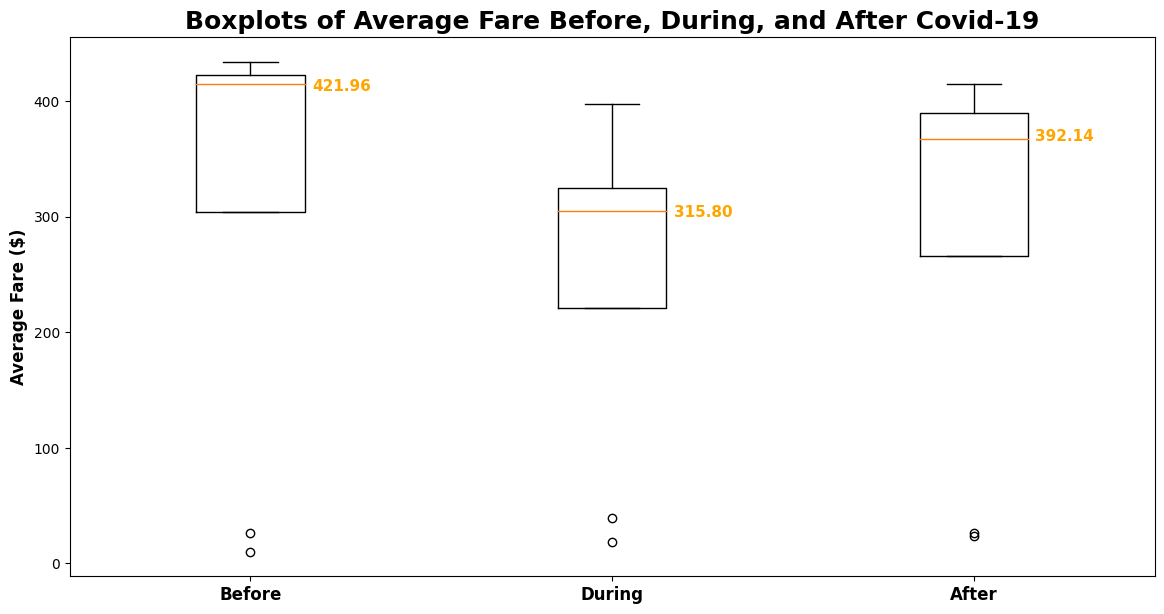

In [85]:
# Create boxplot comparing Average Airfare
plt.figure(figsize=(14,7))
plt.title('Boxplots of Average Fare Before, During, and After Covid-19', fontsize=18, weight='bold')
plt.ylabel('Average Fare ($)', fontsize=12, weight='bold')
plt.boxplot([df_describe_before['Average Fare ($)'], df_describe_during['Average Fare ($)'], df_describe_after['Average Fare ($)']])
plt.xticks([1, 2, 3], ['Before', 'During', 'After'], fontsize=12, weight='bold')
plt.text(1.17, 409.0, '421.96', fontsize=11, color='orange', weight='bold')
plt.text(2.17, 300.0, '315.80', fontsize=11, color='orange', weight='bold')
plt.text(3.17, 366.0, '392.14', fontsize=11, color='orange', weight='bold')
plt.show()

In [ ]:
# # Create a dictionary with total averages before the Covid pandemic
# total_averages_after = df_after_monthly_combined[['Total Passengers',
#                                                   'Total Cancelled Flights',
#                                                   'Total Flights',
#                                                   'Average Passengers per Flight',
#                                                   'Average Cancelled %',
#                                                   'Average Delay (Minutes)',
#                                                   'Average Fare ($)']].mean().round(2).to_dict()

# display(total_averages_after)

In [ ]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_summary.pivot_table(index='State',
#                                    columns=['Year', 'Month'],
#                                    values='No. of Flights'), cmap='YlGnBu')
# plt.title('Average No. of Flights Across States and Time')
# plt.xlabel('Month')
# plt.ylabel('State')
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_summary.pivot_table(index='State',
#                                    columns=['Year', 'Month'],
#                                    values='No. of Flights'), cmap='YlGnBu')
# plt.title('Average No. of Flights Across States and Time')
# plt.xlabel('Month')
# plt.ylabel('State')
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_summary.pivot_table(index='State',
#                                    columns=['Year', 'Month'],
#                                    values='No. of Flights'), cmap='YlGnBu')
# plt.title('Average No. of Flights Across States and Time')
# plt.xlabel('Month')
# plt.ylabel('State')
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_summary.pivot_table(index='State',
#                                    columns=['Year', 'Month'],
#                                    values='No. of Flights'), cmap='YlGnBu')
# plt.title('Average No. of Flights Across States and Time')
# plt.xlabel('Month')
# plt.ylabel('State')
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_summary.pivot_table(index='State',
#                                    columns=['Year', 'Month'],
#                                    values='No. of Flights'), cmap='YlGnBu')
# plt.title('Average No. of Flights Across States and Time')
# plt.xlabel('Month')
# plt.ylabel('State')
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_summary.pivot_table(index='State',
#                                    columns=['Year', 'Month'],
#                                    values='No. of Flights'), cmap='YlGnBu')
# plt.title('Average No. of Flights Across States and Time')
# plt.xlabel('Month')
# plt.ylabel('State')
# plt.xticks(rotation=45)
# plt.show()